# Data Analysis

## Loading data

In [1]:
import pandas as pd

In [2]:
file_path = "../data/00/data.csv"
df = pd.read_csv(file_path)

df.head()

t  device_time_stamp  right_pupil_validity  left_pupil_validity  \
0  1.581362e+15       1.958681e+10                   1.0                  1.0   
1  1.581362e+15       1.958682e+10                   1.0                  1.0   
2  1.581362e+15       1.958682e+10                   1.0                  1.0   
3  1.581362e+15       1.958683e+10                   1.0                  1.0   
4  1.581362e+15       1.958684e+10                   1.0                  1.0   

   right_gaze_direction_validity  left_gaze_direction_validity  \
0                            1.0                           1.0   
1                            1.0                           1.0   
2                            1.0                           1.0   
3                            1.0                           1.0   
4                            1.0                           1.0   

   right_pupil_position_validity  left_pupil_position_validity  \
0                            1.0                           1.0   
1                            1.0                           1.0   
2                            1.0                           1.0   
3                            1.0                           1.0   
4                            1.0                           1.0   

   right_gaze_origin_validity  left_gaze_origin_validity  ...  \
0                         1.0                        1.0  ...   
1                         1.0                        1.0  ...   
2                         1.0                        1.0  ...   
3                         1.0                        1.0  ...   
4                         1.0                        1.0  ...   

   right_gaze_direction_unit_vector_x  right_gaze_direction_unit_vector_y  \
0                           -0.010208                           -0.416336   
1                           -0.018433                           -0.426529   
2                           -0.003845                           -0.424973   
3                           -0.015793                           -0.429733   
4                           -0.018921                           -0.424728   

   right_gaze_direction_unit_vector_z  left_gaze_direction_unit_vector_x  \
0                            0.909149                          -0.151428   
1                            0.904282                          -0.161667   
2                            0.905182                          -0.165756   
3                            0.902802                          -0.166397   
4                            0.905106                          -0.163971   

   left_gaze_direction_unit_vector_y  left_gaze_direction_unit_vector_z  \
0                          -0.397919                           0.904831   
1                          -0.396362                           0.903732   
2                          -0.404755                           0.899261   
3                          -0.403870                           0.899536   
4                          -0.404816                           0.899567   

   right_pupil_position_in_tracking_area_x  \
0                                 0.483577   
1                                 0.485436   
2                                 0.482842   
3                                 0.485428   
4                                 0.486599   

   right_pupil_position_in_tracking_area_y  \
0                                 0.670738   
1                                 0.673628   
2                                 0.673311   
3                                 0.675181   
4                                 0.674295   

   left_pupil_position_in_tracking_area_x  \
0                                0.529318   
1                                0.531834   
2                                0.533464   
3                                0.534325   
4                                0.534670   

   left_pupil_position_in_tracking_area_y  
0                                0.569009  
1                                0.569071  
2             

In [69]:
selected_columns = ["t", "right_gaze_origin_position_in_hmd_coordinates_x", "right_gaze_origin_position_in_hmd_coordinates_y",
                    "left_gaze_origin_position_in_hmd_coordinates_x", "left_gaze_origin_position_in_hmd_coordinates_y"]
df_new = df[selected_columns]

df_new = df_new.rename(columns={
    "right_gaze_origin_position_in_hmd_coordinates_x": "x",
    "right_gaze_origin_position_in_hmd_coordinates_y": "y",
    "left_gaze_origin_position_in_hmd_coordinates_x": "x_left",
    "left_gaze_origin_position_in_hmd_coordinates_y": "y_left"
})

df_new.head()

t          x         y     x_left    y_left
0  1.581362e+15 -29.585846  1.740021  32.436142  5.695251
1  1.581362e+15 -29.591797  1.740555  32.421951  5.614624
2  1.581362e+15 -29.599228  1.711990  32.406448  5.580765
3  1.581362e+15 -29.606445  1.710693  32.386810  5.647583
4  1.581362e+15 -29.615341  1.769791  32.370270  5.730347

## timestamp normalization

#### min-max

In [4]:
df_new["t"] = (df_new["t"] - df_new["t"].min()) / (df_new["t"].max() - df_new["t"].min())

df_new.head()

t          x         y     x_left    y_left
0  0.000000 -29.585846  1.740021  32.436142  5.695251
1  0.000008 -29.591797  1.740555  32.421951  5.614624
2  0.000016 -29.599228  1.711990  32.406448  5.580765
3  0.000024 -29.606445  1.710693  32.386810  5.647583
4  0.000032 -29.615341  1.769791  32.370270  5.730347

## Plotting eyes movement

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D Movement Plot (X, Y, Time)')

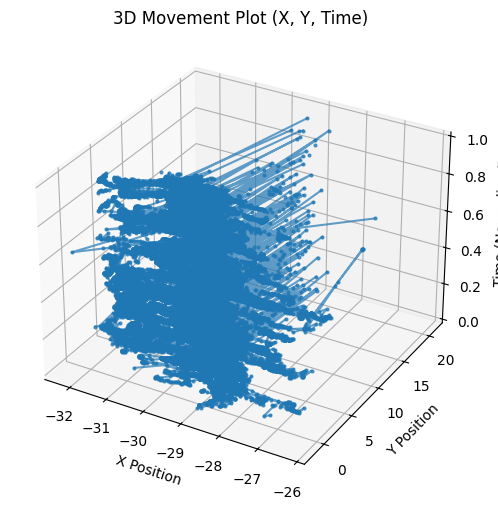

In [6]:
# Create a 3D plot of movement (x, y, t as z-axis)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df_new["x"], df_new["y"], df_new["t"], marker='o', linestyle='-', markersize=2, alpha=0.7)

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Time (Normalized)")
ax.set_title("3D Movement Plot (X, Y, Time)")

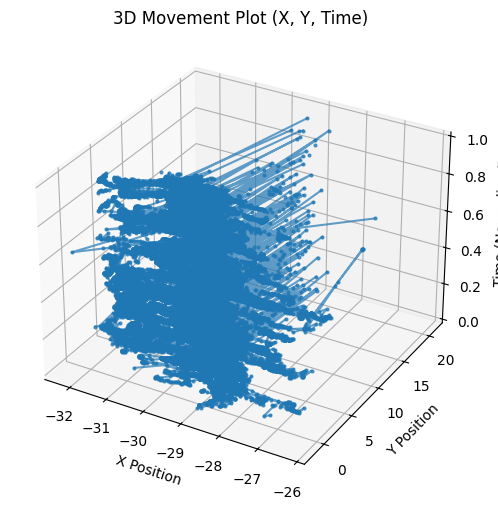

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df_new["x"], df_new["y"], df_new["t"], marker='o', linestyle='-', markersize=2, alpha=0.7)

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Time (Normalized)")
ax.set_title("3D Movement Plot (X, Y, Time)")

plt.show()

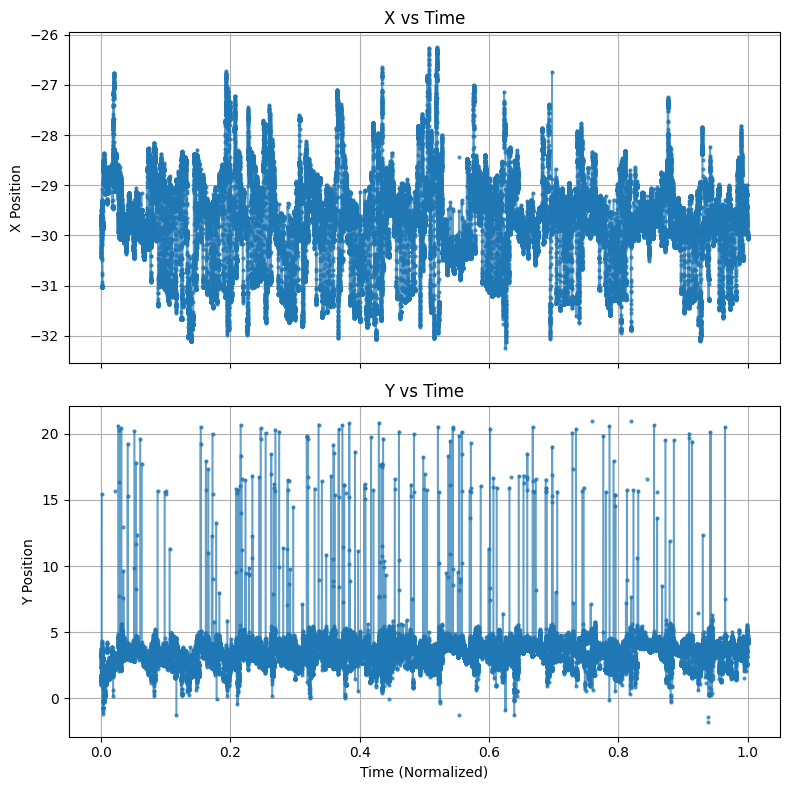

In [8]:
def xy_plot():
    fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
    
    axes[0].plot(df_new["t"], df_new["x"], marker='o', linestyle='-', markersize=2, alpha=0.7)
    axes[0].set_ylabel("X Position")
    axes[0].set_title("X vs Time")
    axes[0].grid(True)
    
    axes[1].plot(df_new["t"], df_new["y"], marker='o', linestyle='-', markersize=2, alpha=0.7)
    axes[1].set_xlabel("Time (Normalized)")
    axes[1].set_ylabel("Y Position")
    axes[1].set_title("Y vs Time")
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

xy_plot()

## position normalization

In [9]:
# df_new = df_new.fillna(0)

df_new["x"] = (df_new["x"] - df_new["x"].mean()) / df_new["x"].std()
df_new["y"] = (df_new["y"] - df_new["y"].mean()) / df_new["y"].std()

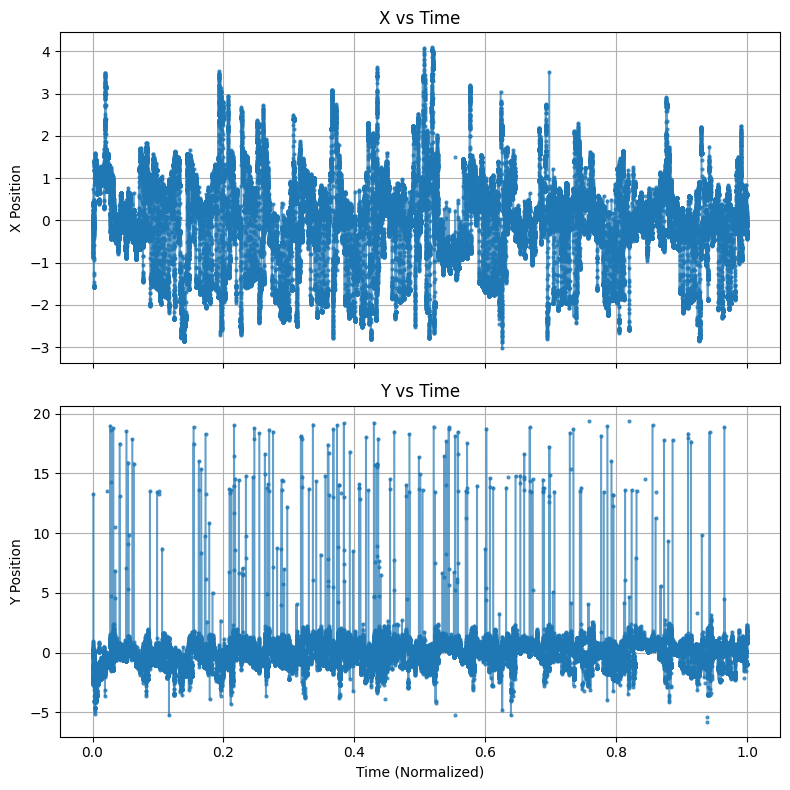

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

axes[0].plot(df_new["t"], df_new["x"], marker='o', linestyle='-', markersize=2, alpha=0.7)
axes[0].set_ylabel("X Position")
axes[0].set_title("X vs Time")
axes[0].grid(True)

axes[1].plot(df_new["t"], df_new["y"], marker='o', linestyle='-', markersize=2, alpha=0.7)
axes[1].set_xlabel("Time (Normalized)")
axes[1].set_ylabel("Y Position")
axes[1].set_title("Y vs Time")
axes[1].grid(True)

plt.tight_layout()
plt.show()

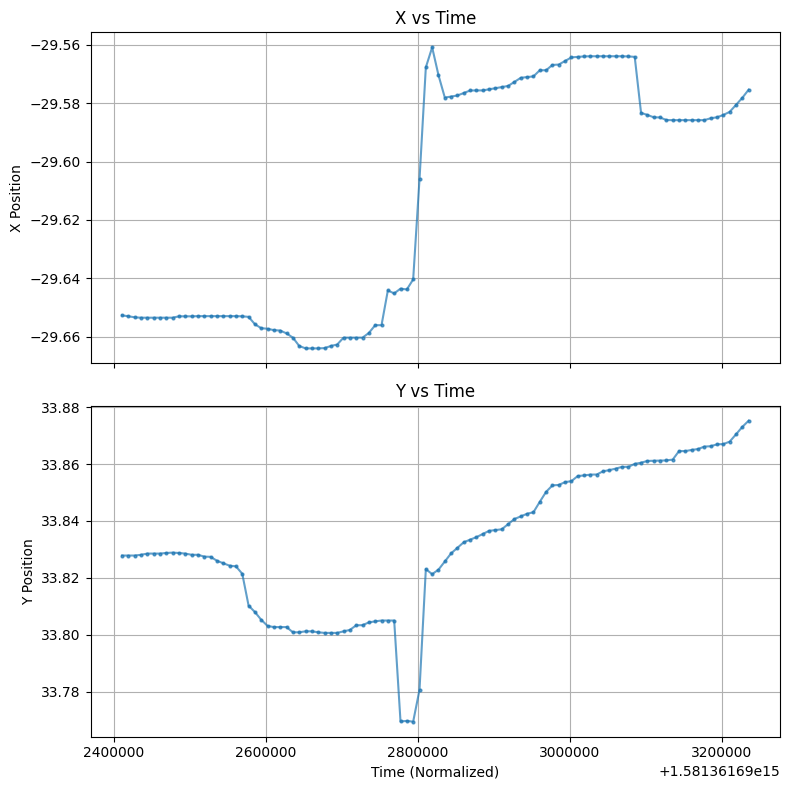

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

start = 5500 # 2500
end = start + 100 # 200

axes[0].plot(df_new["t"].iloc[start:end], df_new["x"].iloc[start:end], marker='o', linestyle='-', markersize=2, alpha=0.7)
axes[0].set_ylabel("X Position")
axes[0].set_title("X vs Time")
axes[0].grid(True)

axes[1].plot(df_new["t"].iloc[start:end], df_new["x_left"].iloc[start:end], marker='o', linestyle='-', markersize=2, alpha=0.7)
axes[1].set_xlabel("Time (Normalized)")
axes[1].set_ylabel("Y Position")
axes[1].set_title("Y vs Time")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [12]:
print(df_new['x'].min())
print(df_new['x'].max())
print(df_new['y'].min())
print(df_new['y'].max())

-3.028713465905789
4.0911609476996
-5.784357280758795
19.42344706068819


## Dropping outliers

In [13]:
Q1_x = df_new["x"].quantile(0.25)
Q3_x = df_new["x"].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_new["y"].quantile(0.25)
Q3_y = df_new["y"].quantile(0.75)
IQR_y = Q3_y - Q1_y

lower_x, upper_x = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x
lower_y, upper_y = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y

df_new = df_new[(df_new["x"] >= lower_x) & (df_new["x"] <= upper_x)]
df_new = df_new[(df_new["y"] >= lower_y) & (df_new["y"] <= upper_y)]

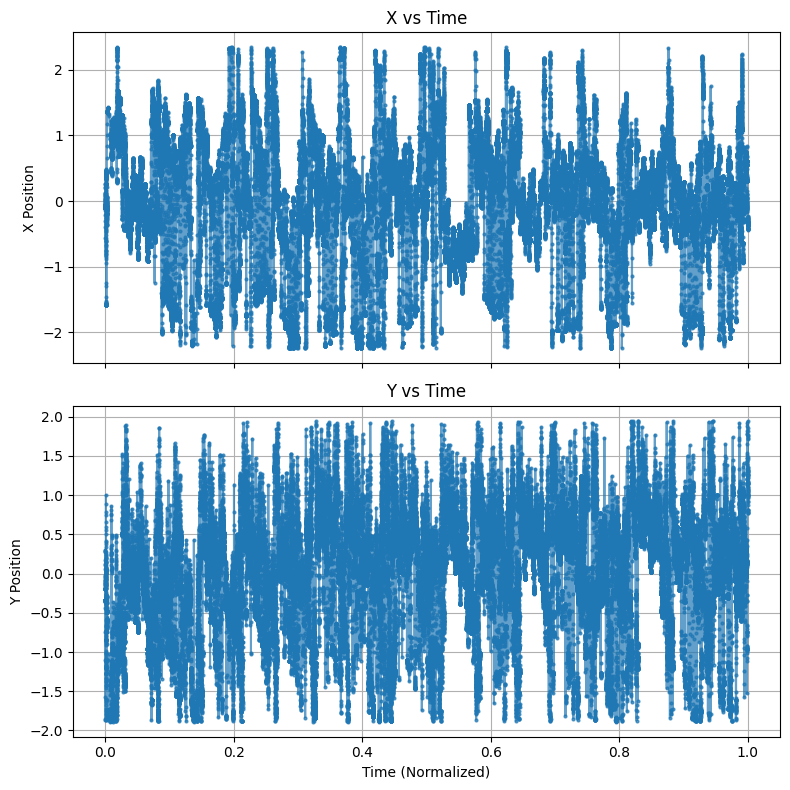

In [14]:
xy_plot()

## calculating distance to origin

In [15]:
import numpy as np

In [16]:
df_new["d"] = np.sqrt(df_new["x"]**2 + df_new["y"]**2)

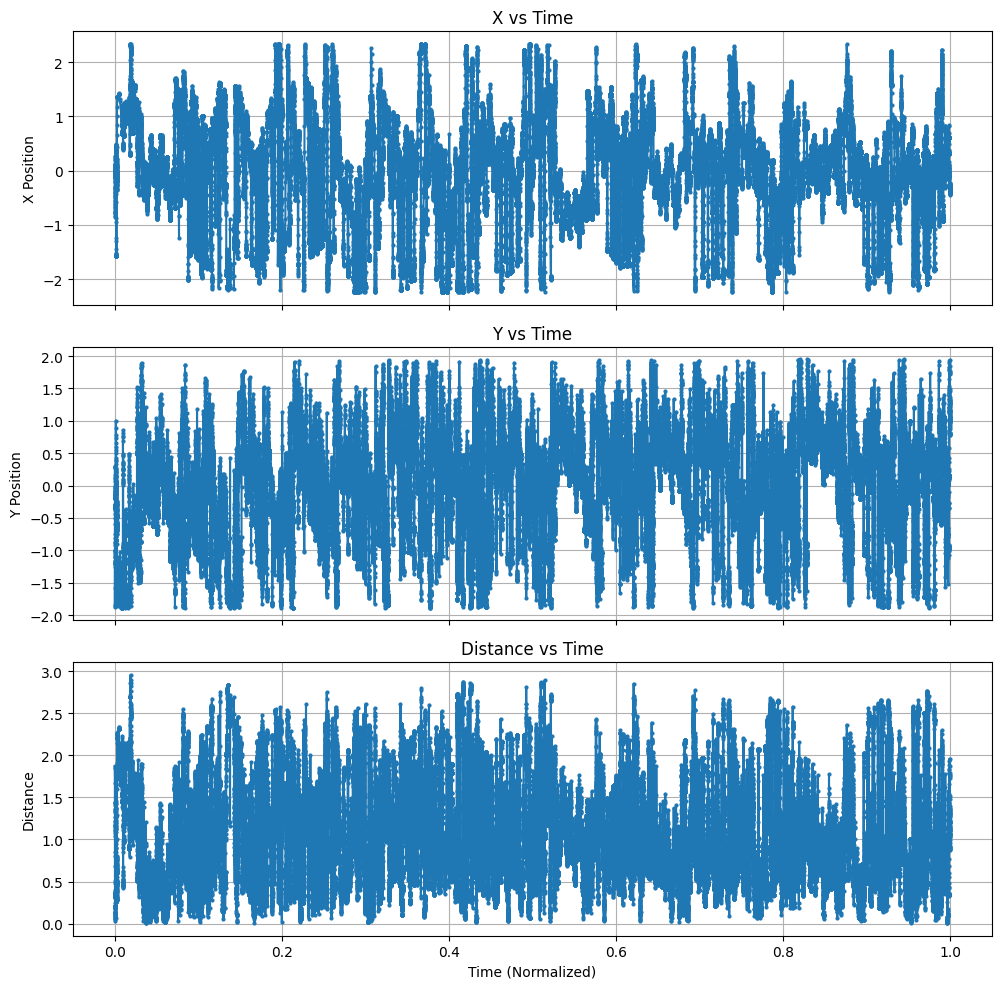

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df_new["t"], df_new["x"], marker='o', linestyle='-', markersize=2)
axs[0].set_ylabel("X Position")
axs[0].set_title("X vs Time")
axs[0].grid(True)

axs[1].plot(df_new["t"], df_new["y"], marker='o', linestyle='-', markersize=2)
axs[1].set_ylabel("Y Position")
axs[1].set_title("Y vs Time")
axs[1].grid(True)

axs[2].plot(df_new["t"], df_new["d"], marker='o', linestyle='-', markersize=2)
axs[2].set_xlabel("Time (Normalized)")
axs[2].set_ylabel("Distance")
axs[2].set_title("Distance vs Time")
axs[2].grid(True)

plt.tight_layout()
plt.show()

## calculate velocities

In [18]:
df_new["d_vel"] = df_new["d"].diff() / df_new["t"].diff()
df_new["x_vel"] = df_new["x"].diff() / df_new["t"].diff()
df_new["y_vel"] = df_new["y"].diff() / df_new["t"].diff()

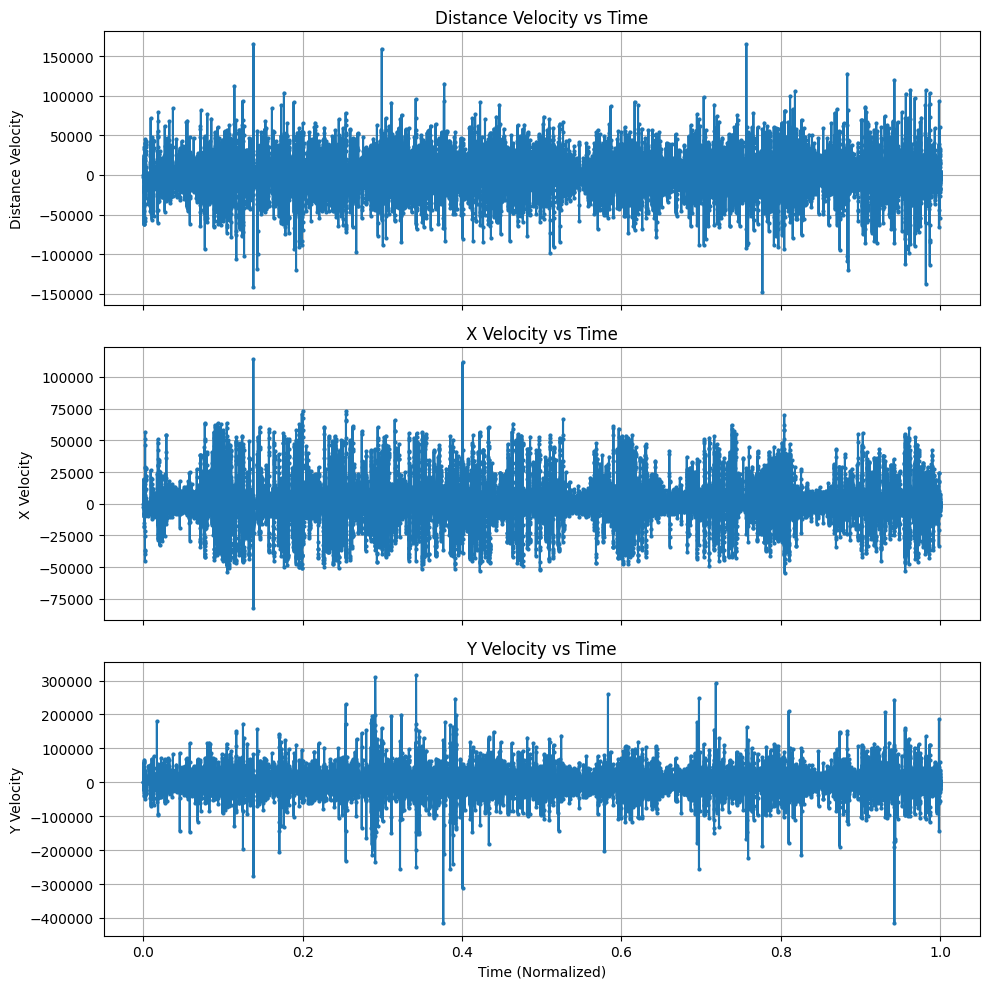

In [19]:
df_new = df_new.fillna(0)

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df_new["t"], df_new["d_vel"], marker='o', linestyle='-', markersize=2)
axs[0].set_ylabel("Distance Velocity")
axs[0].set_title("Distance Velocity vs Time")
axs[0].grid(True)

axs[1].plot(df_new["t"], df_new["x_vel"], marker='o', linestyle='-', markersize=2)
axs[1].set_ylabel("X Velocity")
axs[1].set_title("X Velocity vs Time")
axs[1].grid(True)

axs[2].plot(df_new["t"], df_new["y_vel"], marker='o', linestyle='-', markersize=2)
axs[2].set_xlabel("Time (Normalized)")
axs[2].set_ylabel("Y Velocity")
axs[2].set_title("Y Velocity vs Time")
axs[2].grid(True)

plt.tight_layout()
plt.show()

## angular velocity

In [20]:
df_new["theta"] = np.arctan2(df_new["y"], df_new["x"])
df_new["theta_vel"] = df_new["theta"].diff() / df_new["t"].diff()

df_new = df_new.fillna(0)

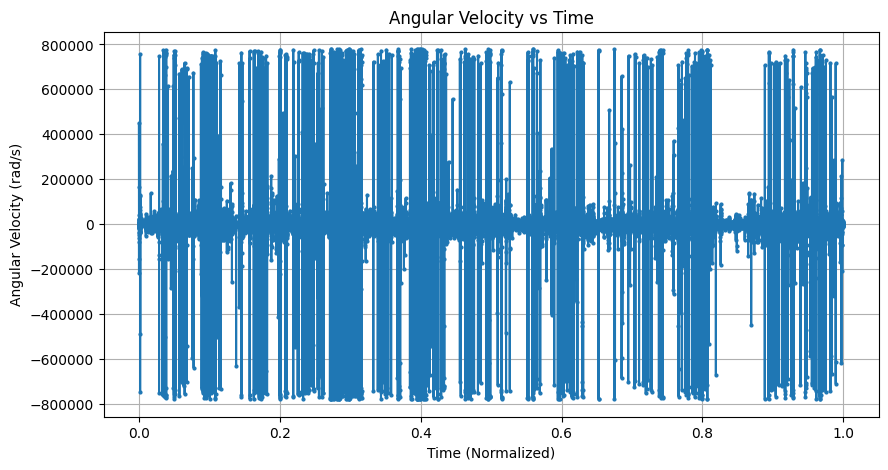

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["theta_vel"], marker='o', linestyle='-', markersize=2)
plt.xlabel("Time (Normalized)")
plt.ylabel("Angular Velocity (rad/s)")
plt.title("Angular Velocity vs Time")
plt.grid(True)
plt.show()

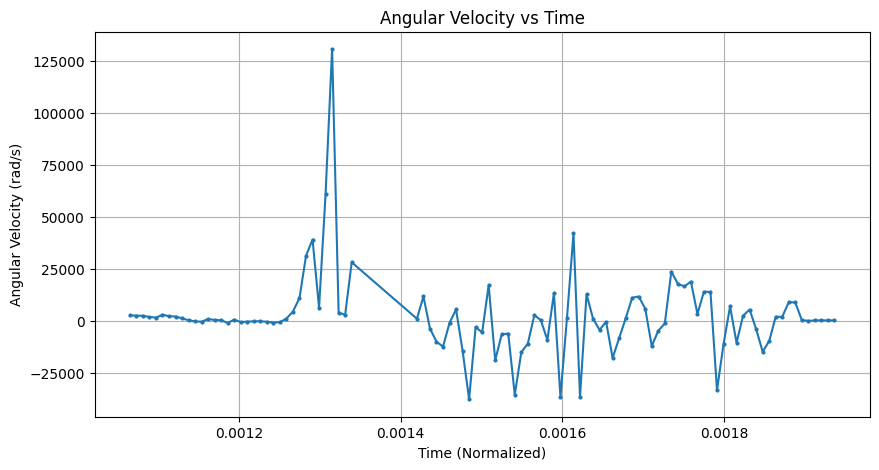

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(df_new["t"].iloc[100:200], df_new["theta_vel"].iloc[100:200], marker='o', linestyle='-', markersize=2)
plt.xlabel("Time (Normalized)")
plt.ylabel("Angular Velocity (rad/s)")
plt.title("Angular Velocity vs Time")
plt.grid(True)
plt.show()


## fft

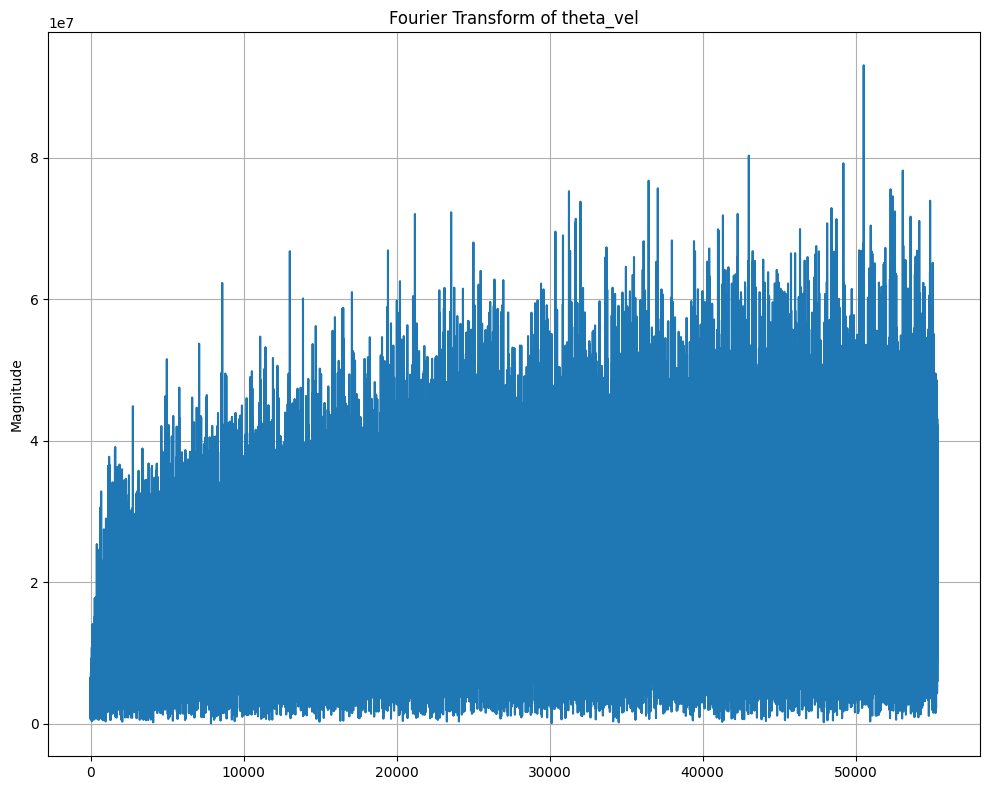

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def fft_column(col_name):
    sampling_rate = 1 / np.mean(np.diff(df_new["t"]))
    
    fft = np.fft.fft(df_new[col_name])
    freqs = np.fft.fftfreq(len(df_new[col_name]), d=1/sampling_rate)
    
    fig, axs = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
    
    axs.plot(freqs[:len(freqs)//2], np.abs(fft[:len(fft)//2]))
    axs.set_ylabel("Magnitude")
    axs.set_title(f"Fourier Transform of {col_name}")
    axs.grid(True)
    
    plt.tight_layout()
    plt.show()

fft_column('theta_vel')

## spectogram

In [24]:
from scipy.signal import spectrogram

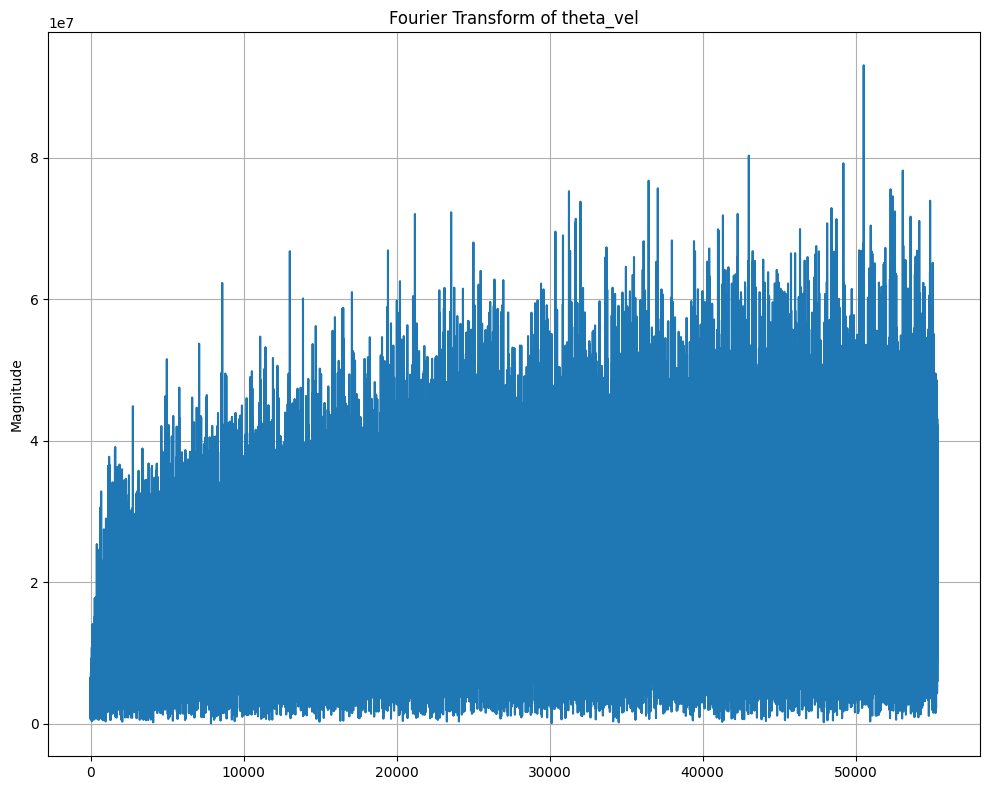

In [25]:
fft_column('theta_vel')

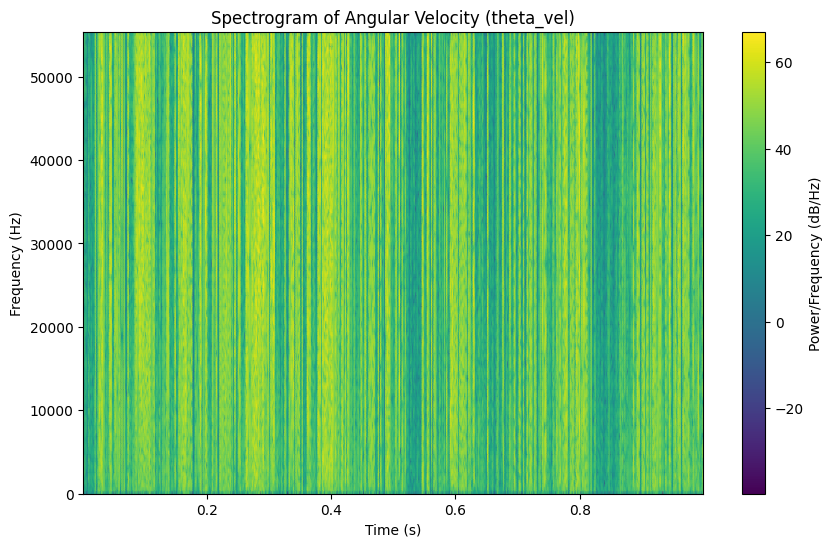

In [26]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["theta_vel"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of Angular Velocity (theta_vel)")
plt.show()

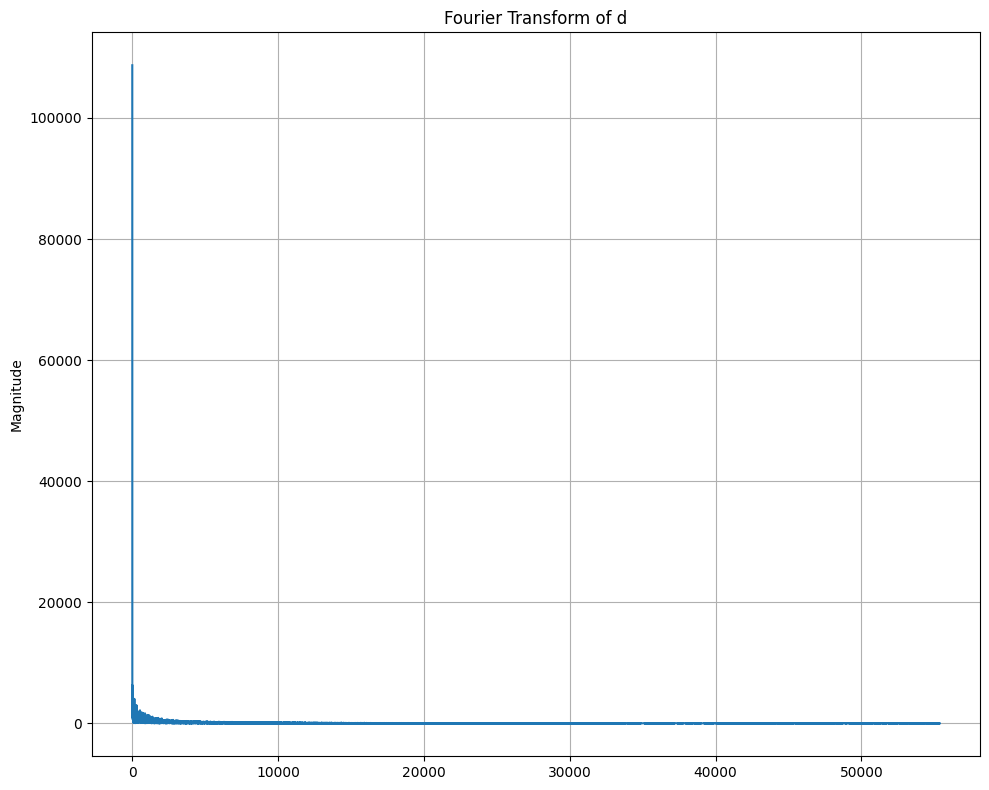

In [27]:
fft_column('d')

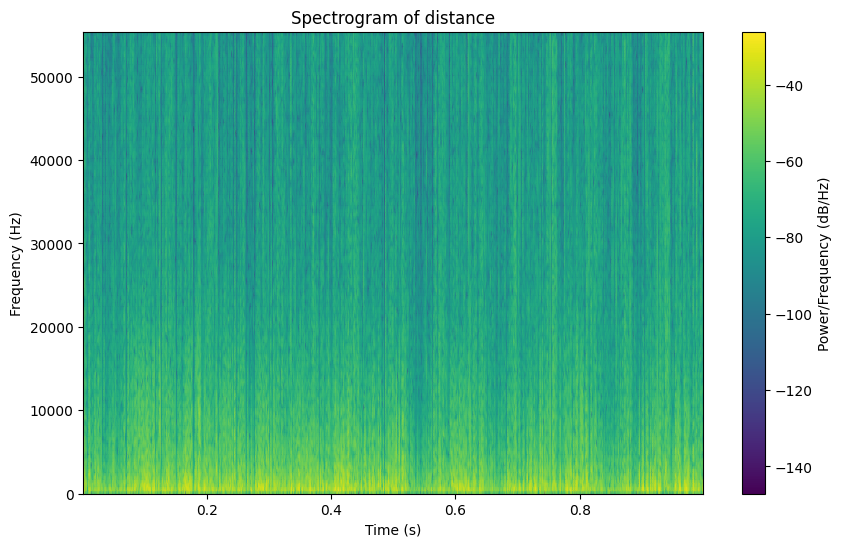

In [28]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["d"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of distance")
plt.show()

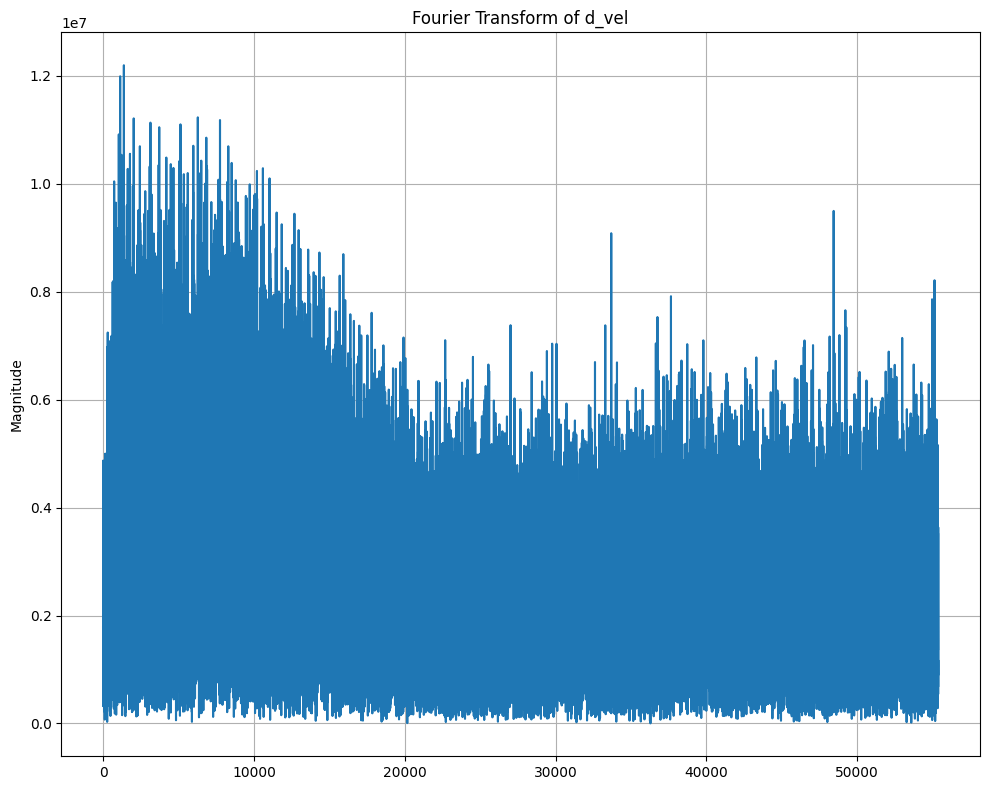

In [29]:
fft_column('d_vel')

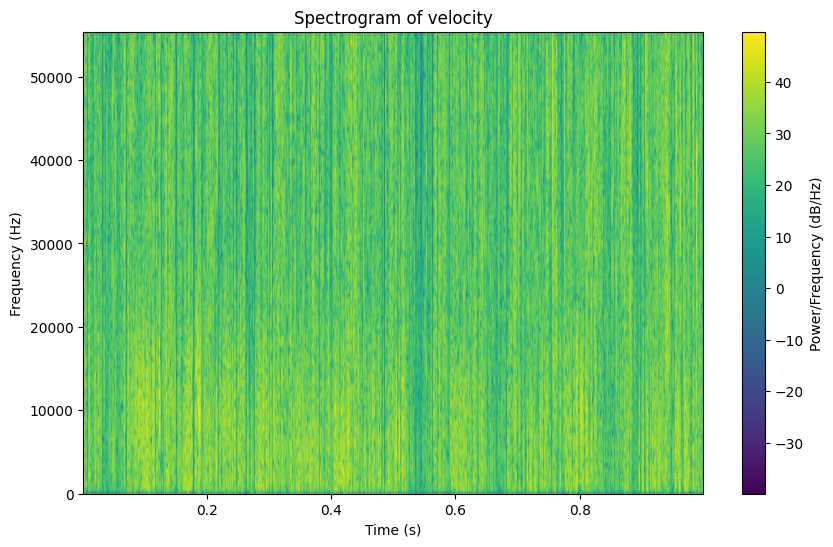

In [30]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["d_vel"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of velocity")
plt.show()

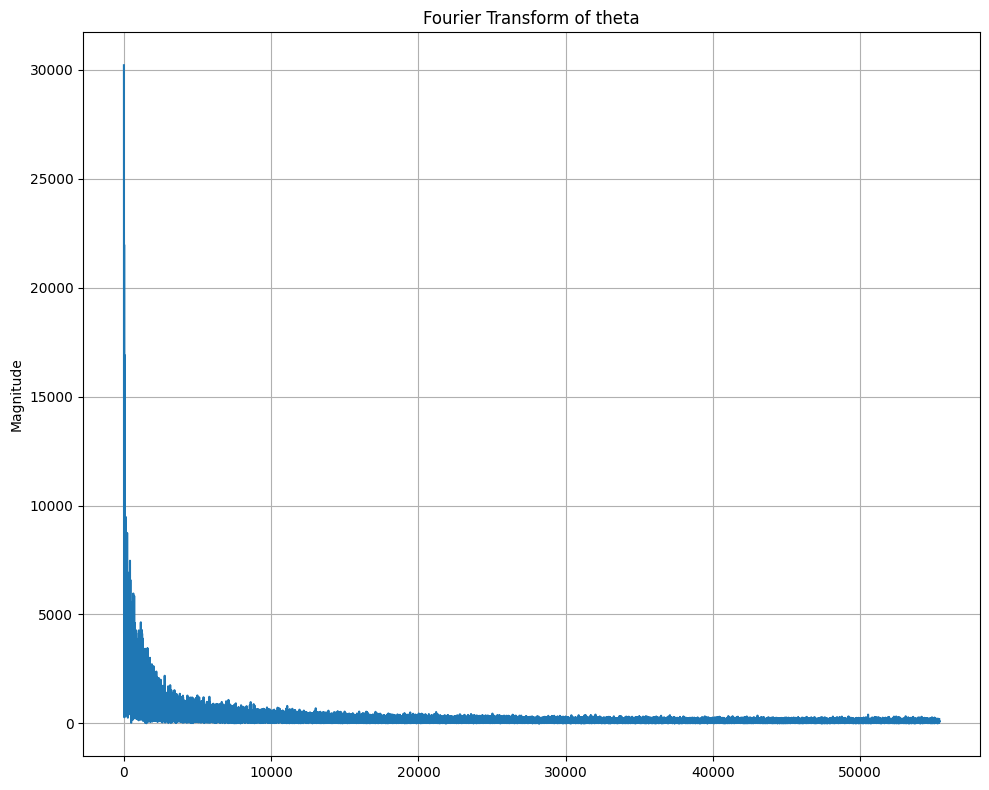

In [31]:
fft_column('theta')

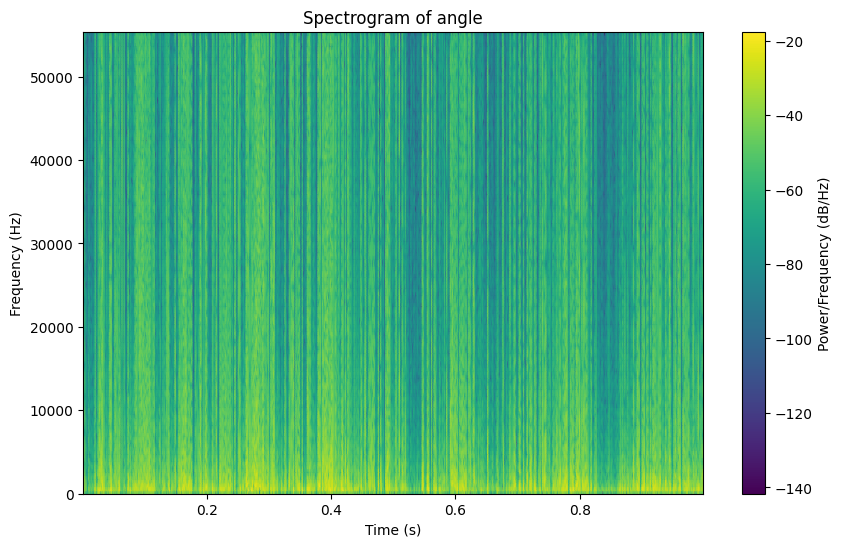

In [32]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["theta"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of angle")
plt.show()

## filtering angular velocity

In [33]:
from scipy.signal import butter, filtfilt

# Define low-pass Butterworth filter
def lowpass_filter(data, cutoff=1000, fs=1/np.mean(np.diff(df_new["t"])), order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Apply low-pass filter to d_vel
df_new["theta_vel_filtered"] = lowpass_filter(df_new["theta_vel"])


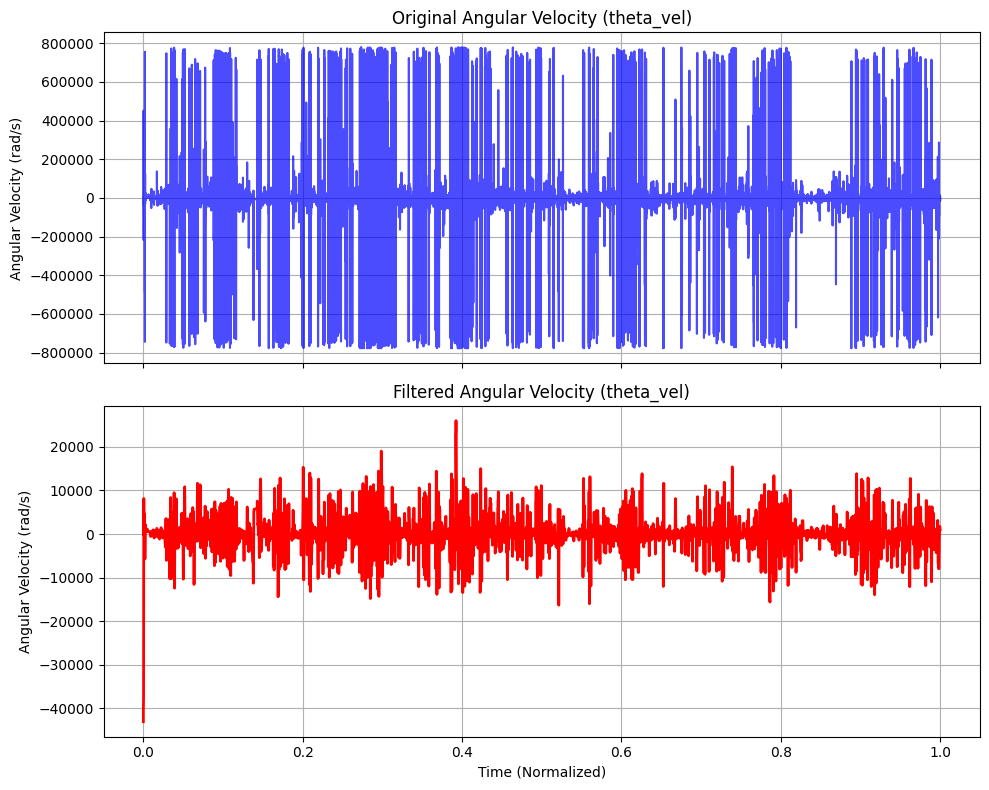

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot original angular velocity
axs[0].plot(df_new["t"], df_new["theta_vel"], label="Original", color="blue", alpha=0.7)
axs[0].set_ylabel("Angular Velocity (rad/s)")
axs[0].set_title("Original Angular Velocity (theta_vel)")
axs[0].grid(True)

# Plot filtered angular velocity
axs[1].plot(df_new["t"], df_new["theta_vel_filtered"], label="Filtered (>1000 rad/s)", color="red", linewidth=2)
axs[1].set_xlabel("Time (Normalized)")
axs[1].set_ylabel("Angular Velocity (rad/s)")
axs[1].set_title("Filtered Angular Velocity (theta_vel)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


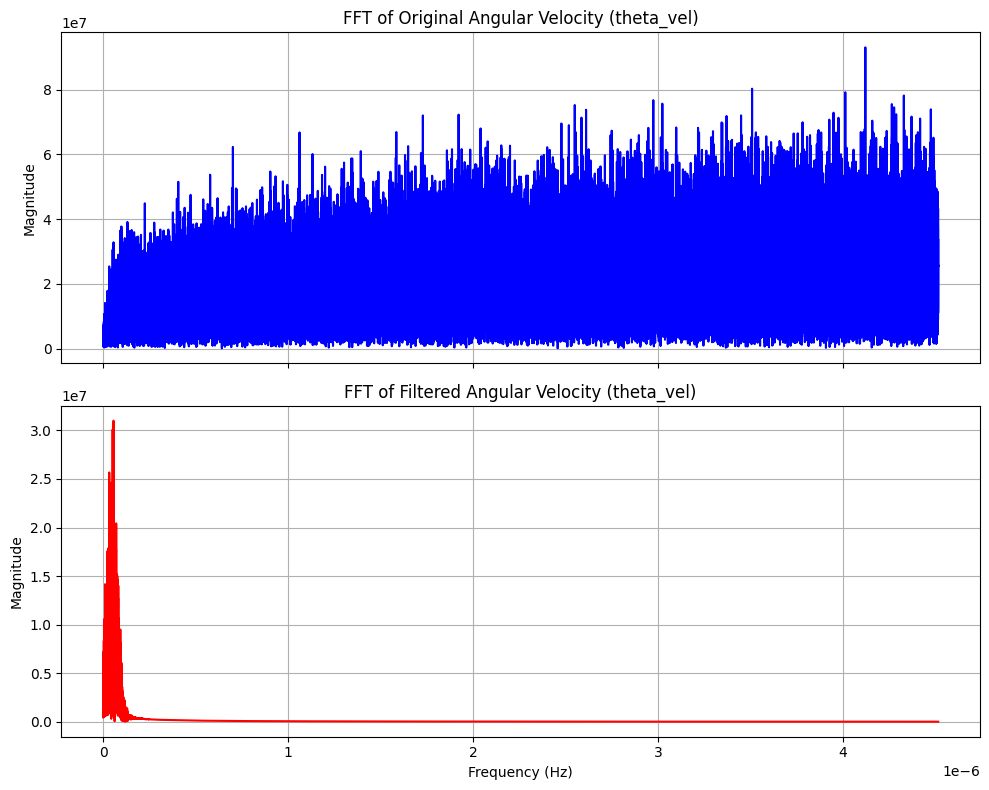

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Compute FFT for original and filtered theta_vel to check frequency components
theta_fft_original = np.fft.fft(df_new["theta_vel"])
theta_freqs_original = np.fft.fftfreq(len(df_new["theta_vel"]), d=1/np.mean(np.diff(df_new["t"])))

theta_fft_filtered = np.fft.fft(df_new["theta_vel_filtered"])
theta_freqs_filtered = np.fft.fftfreq(len(df_new["theta_vel_filtered"]), d=1/np.mean(np.diff(df_new["t"])))

# Create subplots to compare frequency spectra
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot FFT of original angular velocity
axs[0].plot(theta_freqs_original[:len(theta_freqs_original)//2], np.abs(theta_fft_original[:len(theta_fft_original)//2]), label="Original", color="blue")
axs[0].set_ylabel("Magnitude")
axs[0].set_title("FFT of Original Angular Velocity (theta_vel)")
axs[0].grid(True)

# Plot FFT of filtered angular velocity
axs[1].plot(theta_freqs_filtered[:len(theta_freqs_filtered)//2], np.abs(theta_fft_filtered[:len(theta_fft_filtered)//2]), label="Filtered", color="red")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Magnitude")
axs[1].set_title("FFT of Filtered Angular Velocity (theta_vel)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


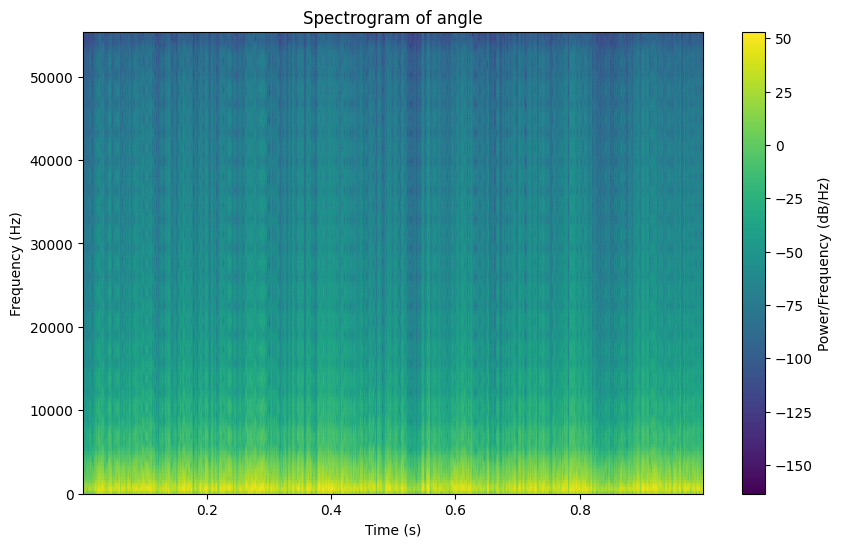

In [36]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["theta_vel_filtered"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of angle")
plt.show()

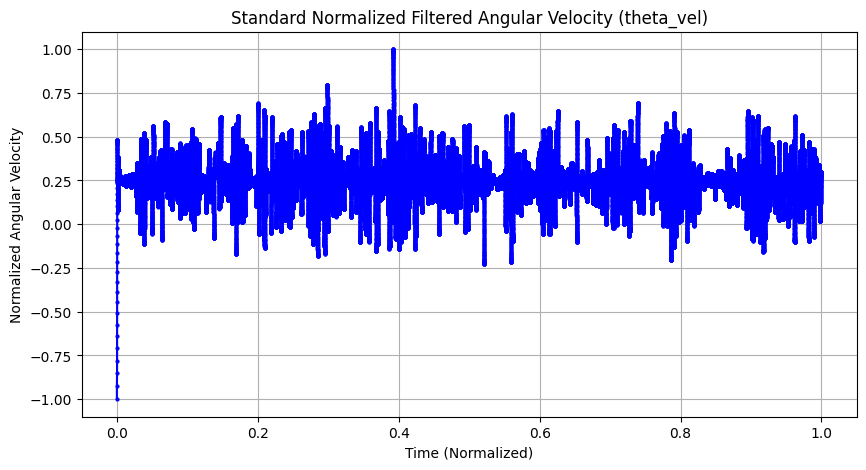

In [37]:
df_new["theta_vel_filtered_norm"] = 2 * ((df_new["theta_vel_filtered"] - df_new["theta_vel_filtered"].min()) / 
                                     (df_new["theta_vel_filtered"].max() - df_new["theta_vel_filtered"].min())) - 1

plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["theta_vel_filtered_norm"], marker='o', linestyle='-', markersize=2, color='blue')
plt.xlabel("Time (Normalized)")
plt.ylabel("Normalized Angular Velocity")
plt.title("Standard Normalized Filtered Angular Velocity (theta_vel)")
plt.grid(True)
plt.show()

In [38]:
df_new["theta_vel_filtered_norm"] = abs(df_new["theta_vel_filtered_norm"])

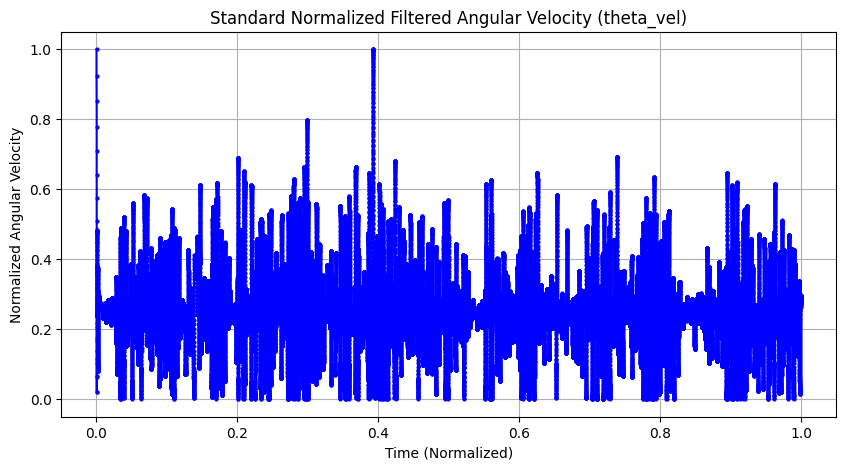

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["theta_vel_filtered_norm"], marker='o', linestyle='-', markersize=2, color='blue')
plt.xlabel("Time (Normalized)")
plt.ylabel("Normalized Angular Velocity")
plt.title("Standard Normalized Filtered Angular Velocity (theta_vel)")
plt.grid(True)
plt.show()

## filtering velocity

In [40]:
from scipy.signal import butter, filtfilt

# Define low-pass Butterworth filter
def lowpass_filter(data, cutoff=20000, fs=1/np.mean(np.diff(df_new["t"])), order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Apply low-pass filter to d_vel
df_new["d_vel_filtered"] = lowpass_filter(df_new["d_vel"])


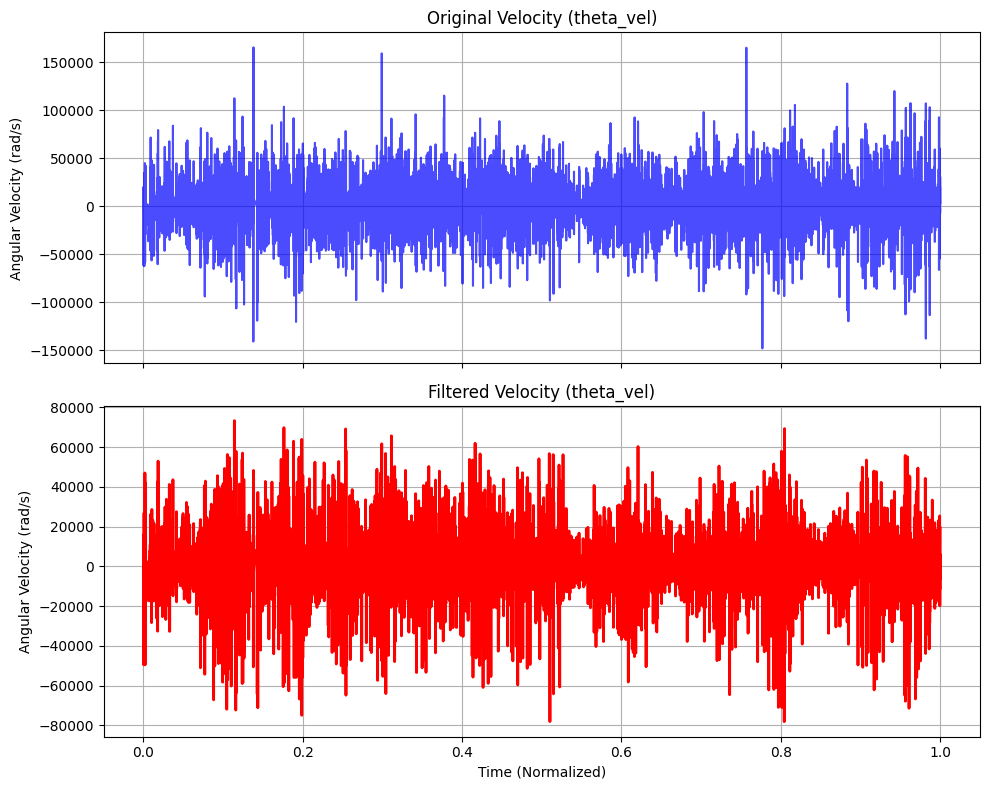

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot original angular velocity
axs[0].plot(df_new["t"], df_new["d_vel"], label="Original", color="blue", alpha=0.7)
axs[0].set_ylabel("Angular Velocity (rad/s)")
axs[0].set_title("Original Velocity (theta_vel)")
axs[0].grid(True)

# Plot filtered angular velocity
axs[1].plot(df_new["t"], df_new["d_vel_filtered"], label="Filtered (>1000 rad/s)", color="red", linewidth=2)
axs[1].set_xlabel("Time (Normalized)")
axs[1].set_ylabel("Angular Velocity (rad/s)")
axs[1].set_title("Filtered Velocity (theta_vel)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


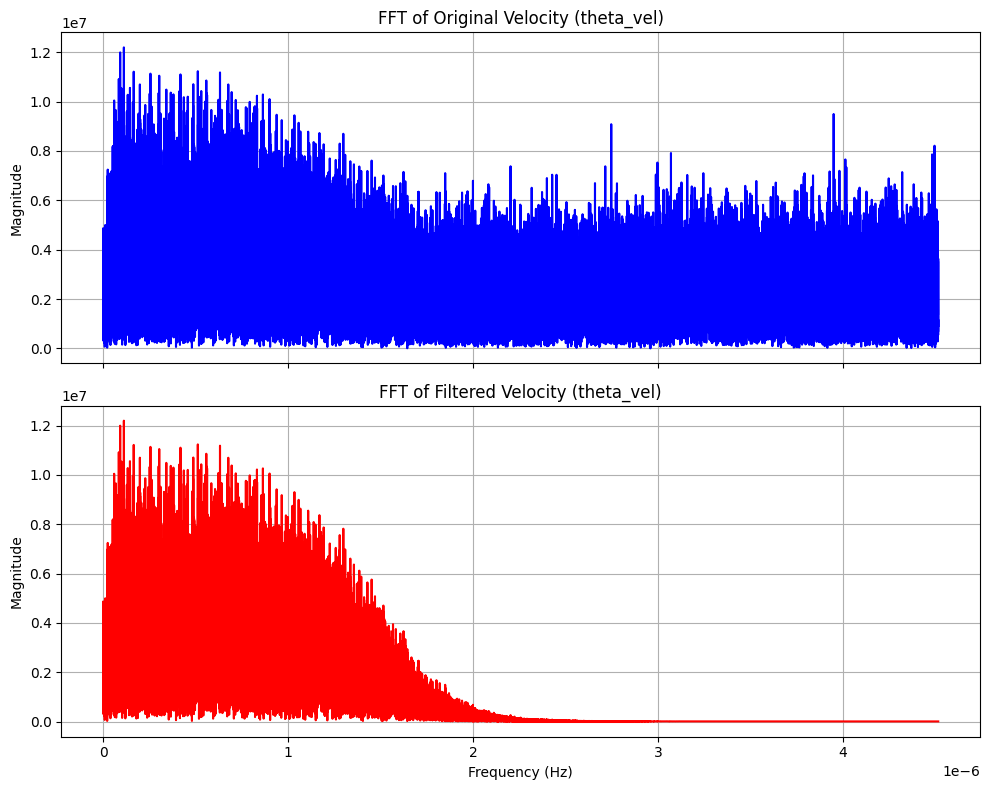

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Compute FFT for original and filtered theta_vel to check frequency components
theta_fft_original = np.fft.fft(df_new["d_vel"])
theta_freqs_original = np.fft.fftfreq(len(df_new["d_vel"]), d=1/np.mean(np.diff(df_new["t"])))

theta_fft_filtered = np.fft.fft(df_new["d_vel_filtered"])
theta_freqs_filtered = np.fft.fftfreq(len(df_new["d_vel_filtered"]), d=1/np.mean(np.diff(df_new["t"])))

# Create subplots to compare frequency spectra
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot FFT of original angular velocity
axs[0].plot(theta_freqs_original[:len(theta_freqs_original)//2], np.abs(theta_fft_original[:len(theta_fft_original)//2]), label="Original", color="blue")
axs[0].set_ylabel("Magnitude")
axs[0].set_title("FFT of Original Velocity (theta_vel)")
axs[0].grid(True)

# Plot FFT of filtered angular velocity
axs[1].plot(theta_freqs_filtered[:len(theta_freqs_filtered)//2], np.abs(theta_fft_filtered[:len(theta_fft_filtered)//2]), label="Filtered", color="red")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Magnitude")
axs[1].set_title("FFT of Filtered Velocity (theta_vel)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


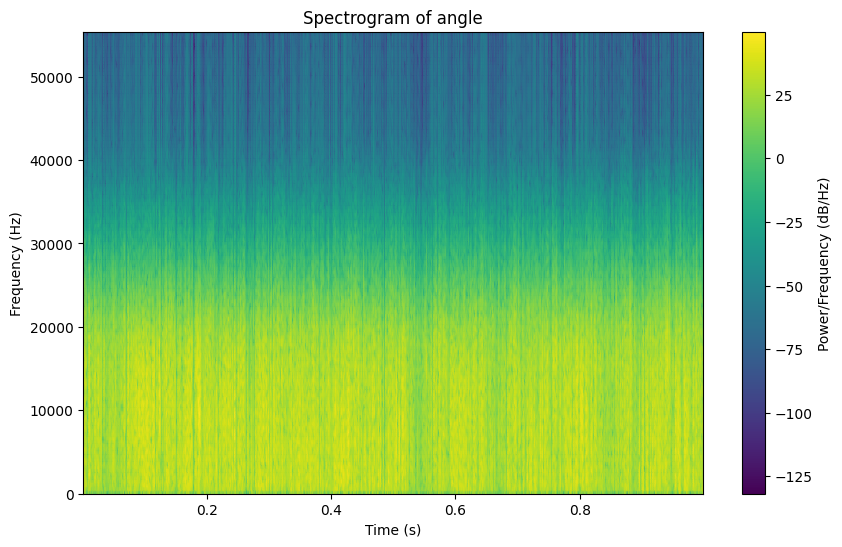

In [43]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["d_vel_filtered"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of angle")
plt.show()

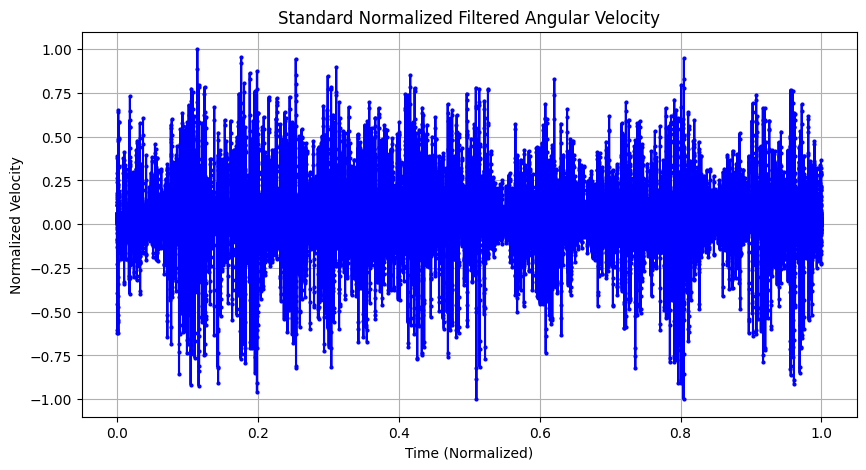

In [44]:
df_new["d_vel_filtered_norm"] = 2 * ((df_new["d_vel_filtered"] - df_new["d_vel_filtered"].min()) / 
                                     (df_new["d_vel_filtered"].max() - df_new["d_vel_filtered"].min())) - 1


plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["d_vel_filtered_norm"], marker='o', linestyle='-', markersize=2, color='blue')
plt.xlabel("Time (Normalized)")
plt.ylabel("Normalized Velocity")
plt.title("Standard Normalized Filtered Angular Velocity")
plt.grid(True)
plt.show()

In [45]:
df_new["d_vel_filtered_norm"] = 1 - abs(df_new["d_vel_filtered_norm"])

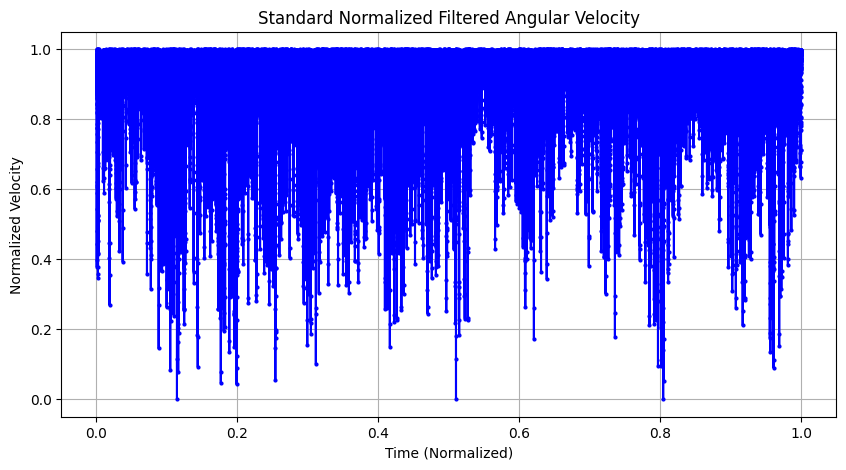

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["d_vel_filtered_norm"], marker='o', linestyle='-', markersize=2, color='blue')
plt.xlabel("Time (Normalized)")
plt.ylabel("Normalized Velocity")
plt.title("Standard Normalized Filtered Angular Velocity")
plt.grid(True)
plt.show()

## filtering distances

In [47]:
from scipy.signal import butter, filtfilt

# Define high-pass Butterworth filter
def highpass_filter(data, cutoff=20000, fs=1/np.mean(np.diff(df_new["t"])), order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Apply high-pass filter to angular velocity (theta_vel)
df_new["d_filtered"] = highpass_filter(df_new["d"])


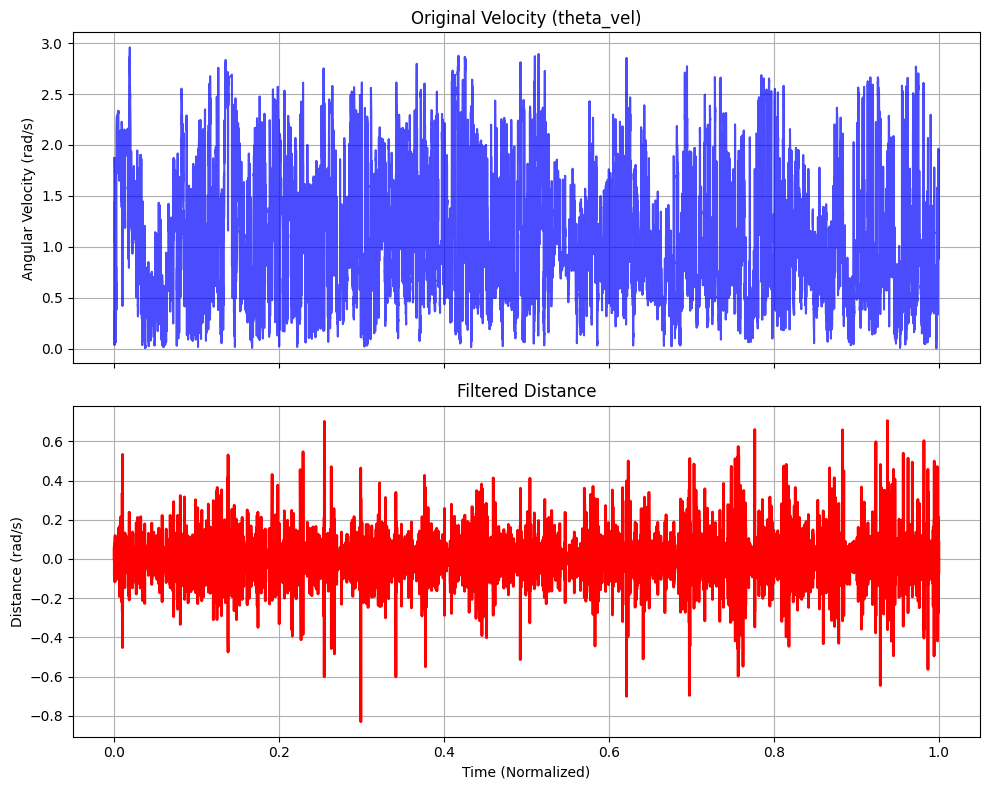

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot original angular velocity
axs[0].plot(df_new["t"], df_new["d"], label="Original", color="blue", alpha=0.7)
axs[0].set_ylabel("Angular Velocity (rad/s)")
axs[0].set_title("Original Velocity (theta_vel)")
axs[0].grid(True)

# Plot filtered angular velocity
axs[1].plot(df_new["t"], df_new["d_filtered"], label="Filtered (>1000 rad/s)", color="red", linewidth=2)
axs[1].set_xlabel("Time (Normalized)")
axs[1].set_ylabel("Distance (rad/s)")
axs[1].set_title("Filtered Distance")
axs[1].grid(True)

plt.tight_layout()
plt.show()


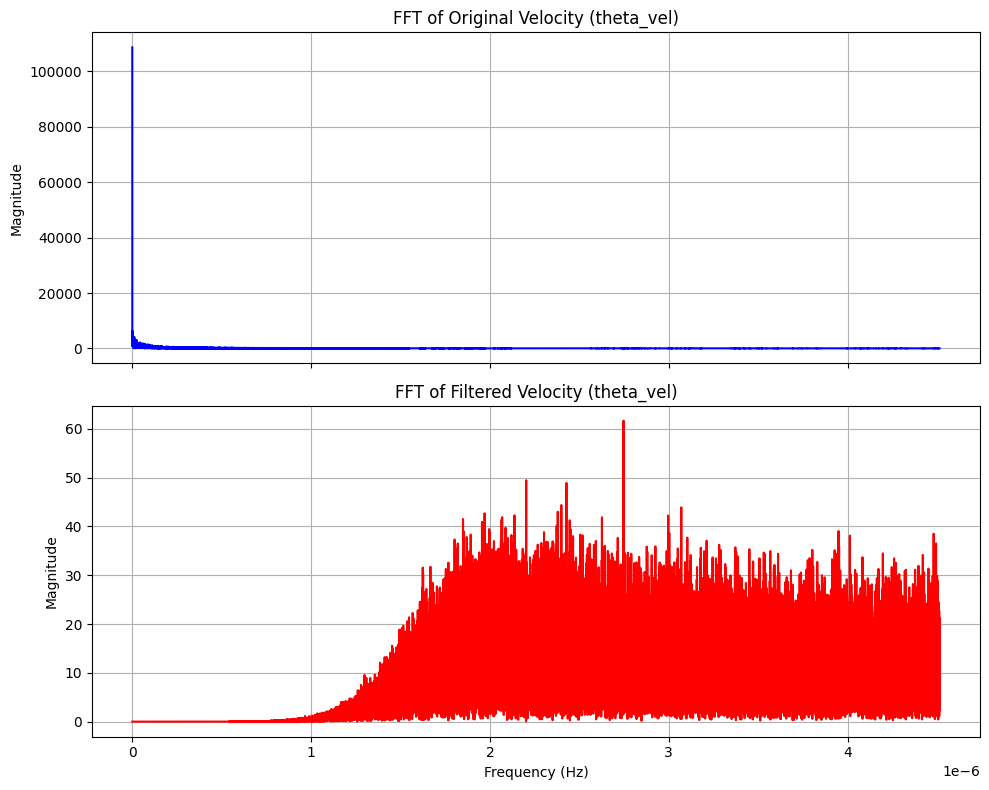

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Compute FFT for original and filtered theta_vel to check frequency components
theta_fft_original = np.fft.fft(df_new["d"])
theta_freqs_original = np.fft.fftfreq(len(df_new["d"]), d=1/np.mean(np.diff(df_new["t"])))

theta_fft_filtered = np.fft.fft(df_new["d_filtered"])
theta_freqs_filtered = np.fft.fftfreq(len(df_new["d_filtered"]), d=1/np.mean(np.diff(df_new["t"])))

# Create subplots to compare frequency spectra
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot FFT of original angular velocity
axs[0].plot(theta_freqs_original[:len(theta_freqs_original)//2], np.abs(theta_fft_original[:len(theta_fft_original)//2]), label="Original", color="blue")
axs[0].set_ylabel("Magnitude")
axs[0].set_title("FFT of Original Velocity (theta_vel)")
axs[0].grid(True)

# Plot FFT of filtered angular velocity
axs[1].plot(theta_freqs_filtered[:len(theta_freqs_filtered)//2], np.abs(theta_fft_filtered[:len(theta_fft_filtered)//2]), label="Filtered", color="red")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Magnitude")
axs[1].set_title("FFT of Filtered Velocity (theta_vel)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


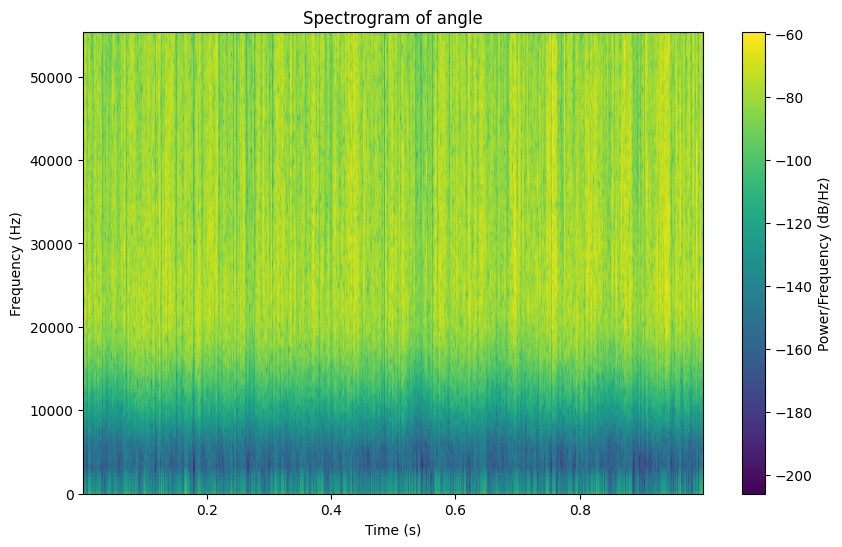

In [50]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["d_filtered"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of angle")
plt.show()

In [51]:
df_new['d_filtered'] = abs(df_new['d_filtered'])

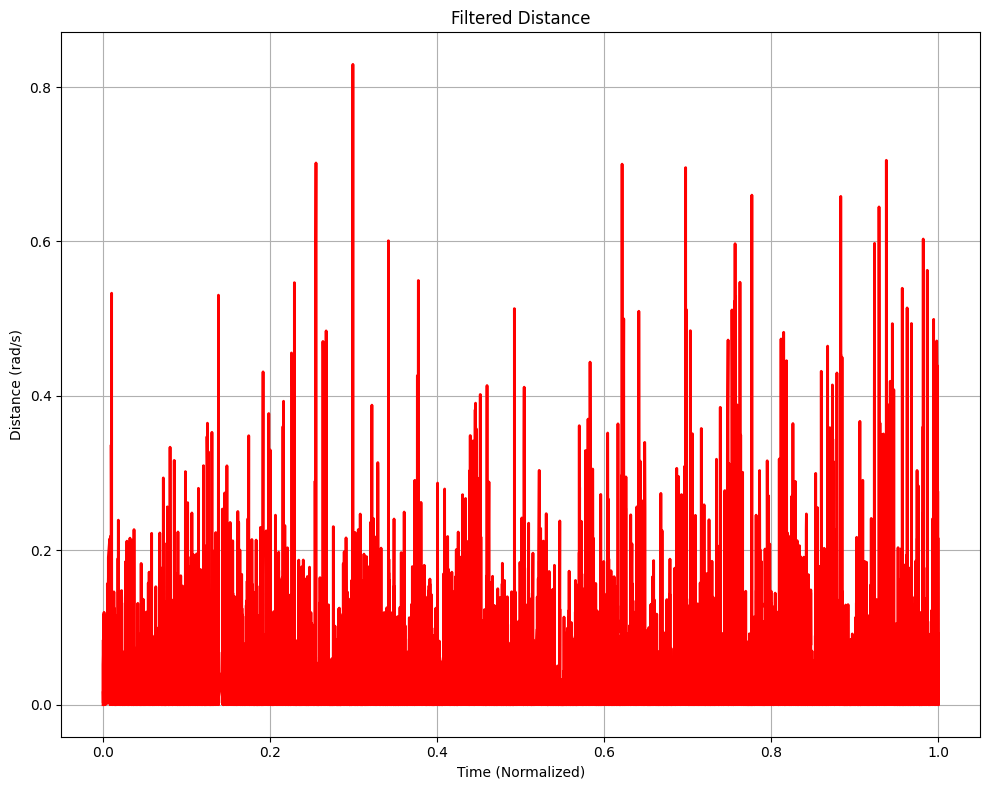

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8), sharex=True)

# Plot filtered angular velocity
axs.plot(df_new["t"], df_new["d_filtered"], label="Filtered (>1000 rad/s)", color="red", linewidth=2)
axs.set_xlabel("Time (Normalized)")
axs.set_ylabel("Distance (rad/s)")
axs.set_title("Filtered Distance")
axs.grid(True)

plt.tight_layout()
plt.show()


In [53]:
df_new['d_filtered'] = (df_new['d_filtered'] - df_new['d_filtered'].min()) / (df_new['d_filtered'].max() - df_new['d_filtered'].min())

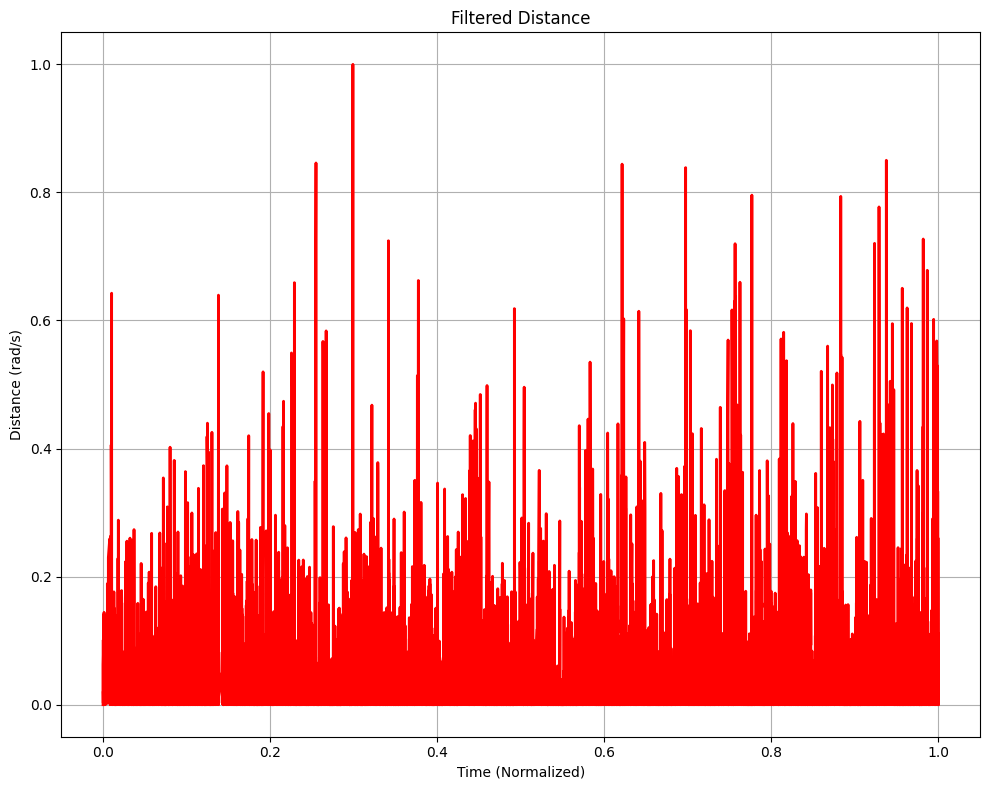

In [54]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8), sharex=True)

# Plot filtered angular velocity
axs.plot(df_new["t"], df_new["d_filtered"], label="Filtered (>1000 rad/s)", color="red", linewidth=2)
axs.set_xlabel("Time (Normalized)")
axs.set_ylabel("Distance (rad/s)")
axs.set_title("Filtered Distance")
axs.grid(True)

plt.tight_layout()
plt.show()


## saccade movements

In [55]:
df_new['saccade'] = df_new["d_filtered"] * df_new["theta_vel_filtered_norm"]

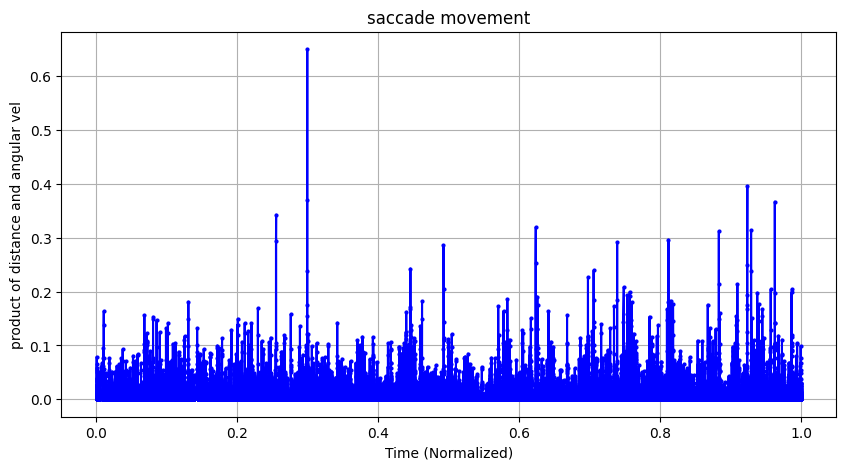

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["saccade"], marker='o', linestyle='-', markersize=2, color='blue')
plt.xlabel("Time (Normalized)")
plt.ylabel("product of distance and angular vel")
plt.title("saccade movement")
plt.grid(True)
plt.show()

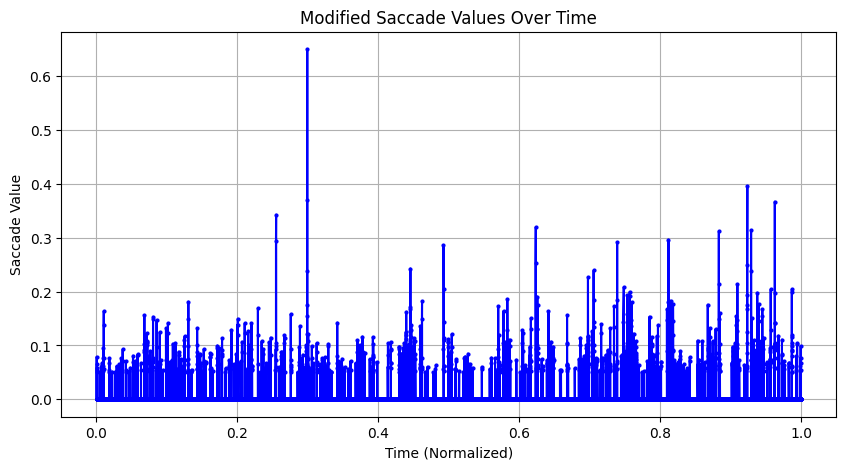

In [57]:
# Assign 0 to values lower than 0.05 in df_new['saccade']
df_new["micro_saccade"] = df_new["saccade"].where(df_new["saccade"] >= 0.05, 0)

plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["micro_saccade"], marker='o', linestyle='-', markersize=2, color='blue')
plt.xlabel("Time (Normalized)")
plt.ylabel("Saccade Value")
plt.title("Modified Saccade Values Over Time")
plt.grid(True)
plt.show()


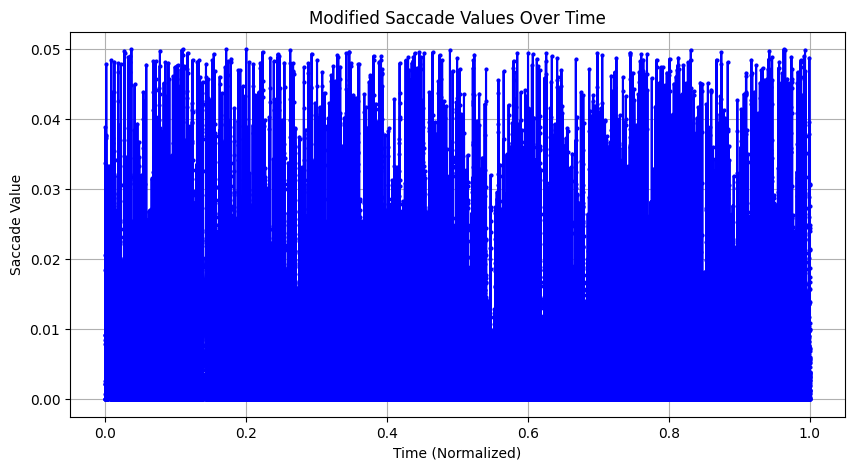

In [58]:
df_new["macro_saccade"] = df_new["saccade"].where(df_new["saccade"] < 0.05, 0)

plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["macro_saccade"], marker='o', linestyle='-', markersize=2, color='blue')
plt.xlabel("Time (Normalized)")
plt.ylabel("Saccade Value")
plt.title("Modified Saccade Values Over Time")
plt.grid(True)
plt.show()


In [59]:
df_new["micro_saccade"] = (df_new["saccade"] > 0.05).astype(int)
df_new["macro_saccade"] = (df_new["saccade"] <= 0.05).astype(int)

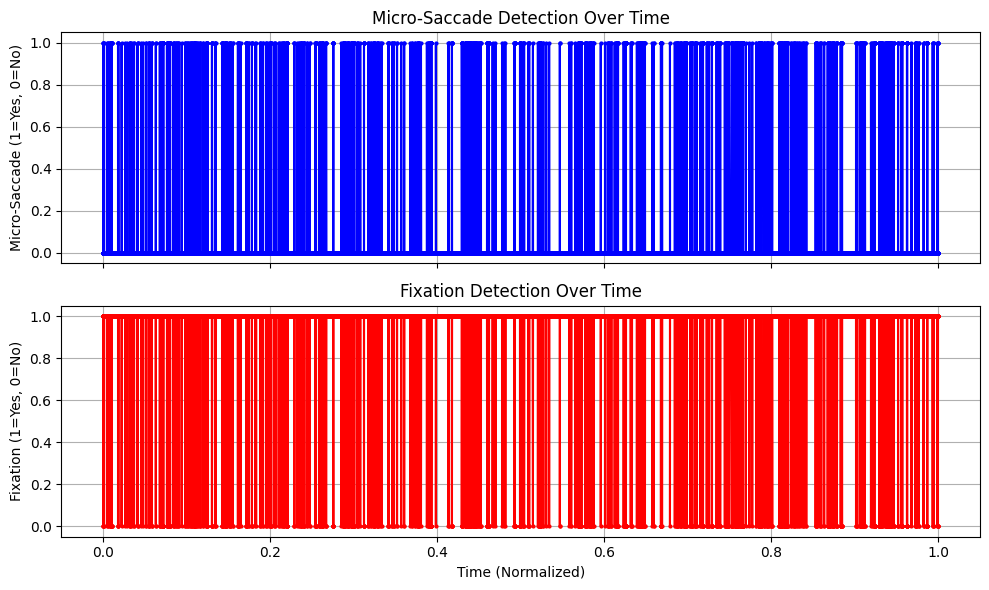

In [60]:
import matplotlib.pyplot as plt

# Create subplots for micro-saccade and fixation
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot micro-saccade
axs[0].plot(df_new["t"], df_new["micro_saccade"], marker='o', linestyle='-', markersize=2, color='blue')
axs[0].set_ylabel("Micro-Saccade (1=Yes, 0=No)")
axs[0].set_title("Micro-Saccade Detection Over Time")
axs[0].grid(True)

# Plot fixation
axs[1].plot(df_new["t"], df_new["macro_saccade"], marker='o', linestyle='-', markersize=2, color='red')
axs[1].set_xlabel("Time (Normalized)")
axs[1].set_ylabel("Fixation (1=Yes, 0=No)")
axs[1].set_title("Fixation Detection Over Time")
axs[1].grid(True)

plt.tight_layout()
plt.show()


# Using saccade as mask

In [61]:
df_new["x_micro"] = df_new["x"] * df_new["micro_saccade"]
df_new["y_micro"] = df_new["y"] * df_new["micro_saccade"]

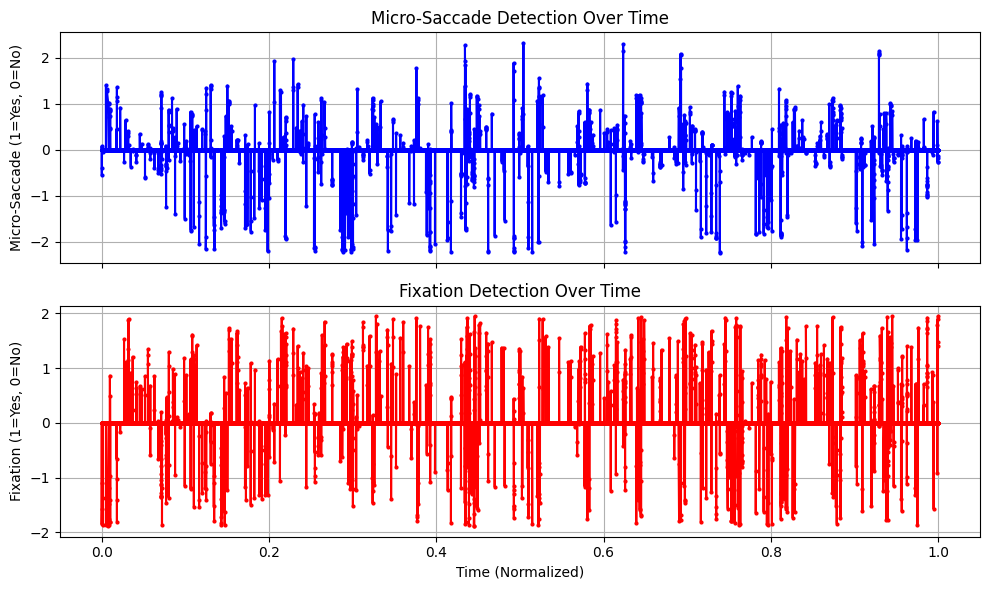

In [62]:
import matplotlib.pyplot as plt

# Create subplots for micro-saccade and fixation
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot micro-saccade
axs[0].plot(df_new["t"], df_new["x_micro"], marker='o', linestyle='-', markersize=2, color='blue')
axs[0].set_ylabel("Micro-Saccade (1=Yes, 0=No)")
axs[0].set_title("Micro-Saccade Detection Over Time")
axs[0].grid(True)

# Plot fixation
axs[1].plot(df_new["t"], df_new["y_micro"], marker='o', linestyle='-', markersize=2, color='red')
axs[1].set_xlabel("Time (Normalized)")
axs[1].set_ylabel("Fixation (1=Yes, 0=No)")
axs[1].set_title("Fixation Detection Over Time")
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [63]:
df_new["x_macro"] = df_new["x"] * df_new["macro_saccade"]
df_new["y_macro"] = df_new["y"] * df_new["macro_saccade"]

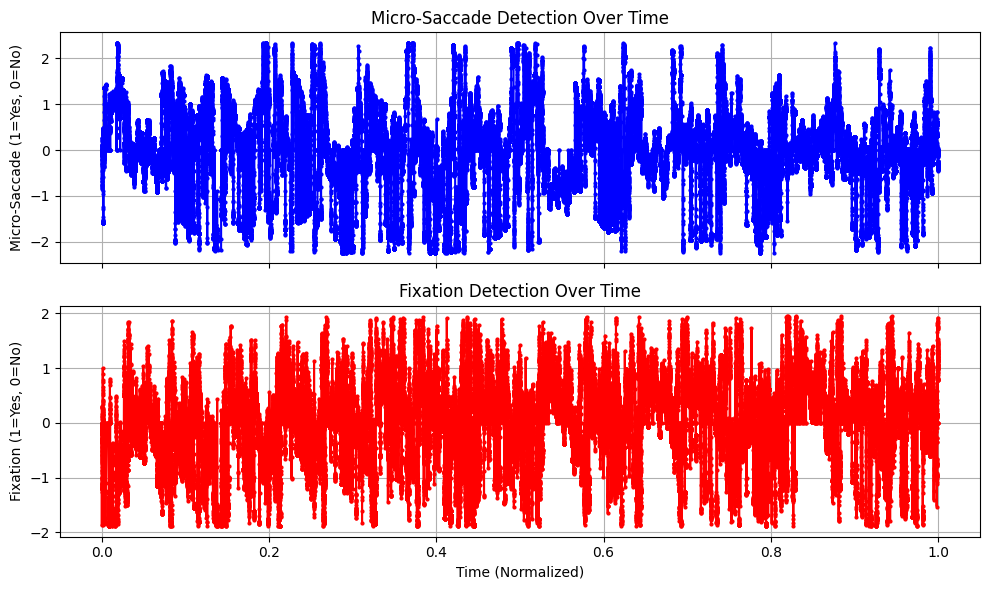

In [64]:
import matplotlib.pyplot as plt

# Create subplots for micro-saccade and fixation
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot micro-saccade
axs[0].plot(df_new["t"], df_new["x_macro"], marker='o', linestyle='-', markersize=2, color='blue')
axs[0].set_ylabel("Micro-Saccade (1=Yes, 0=No)")
axs[0].set_title("Micro-Saccade Detection Over Time")
axs[0].grid(True)

# Plot fixation
axs[1].plot(df_new["t"], df_new["y_macro"], marker='o', linestyle='-', markersize=2, color='red')
axs[1].set_xlabel("Time (Normalized)")
axs[1].set_ylabel("Fixation (1=Yes, 0=No)")
axs[1].set_title("Fixation Detection Over Time")
axs[1].grid(True)

plt.tight_layout()
plt.show()


# Pipeline

In [65]:
from scipy.stats import skew, kurtosis
from scipy.signal import welch
import numpy as np

In [66]:
class Pipeline:

    distance = None
    angular_velocity = None
    saccade = None
    micro_saccade = None
    macro_saccade = None

    x_micro = None
    y_micro = None
    x_macro = None
    y_macro = None
    
    def __init__(self, t, x, y):
        self.t = t
        self.x = x
        self.y = y

    def run(self):
        self.__normalization()
        self.__dropping_outliers()
        self.__calculate_distance_to_origin()
        self.__calculate_angular_velocity()
        self.__filtering_angular_velocity()
        self.__filtering_distance()
        self.__calculate_saccade()
        self.__calculate_micro_macro()
        self.__mask_xy()
        # self.__plot_results()
        return self.__get_feature_vector()

    def __normalization(self):
        self.t = (self.t - self.t.min()) / (self.t.max() - self.t.min())
        self.x = (self.x - self.x.mean()) / self.x.std()
        self.y = (self.y - self.y.mean()) / self.y.std()

    def __dropping_outliers(self):
        Q1_x = self.x.quantile(0.25)
        Q3_x = self.x.quantile(0.75)
        IQR_x = Q3_x - Q1_x

        Q1_y = self.y.quantile(0.25)
        Q3_y = self.y.quantile(0.75)
        IQR_y = Q3_y - Q1_y

        lower_x, upper_x = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x
        lower_y, upper_y = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y

        mask_x = (self.x >= lower_x) & (self.x <= upper_x)
        mask_y = (self.y >= lower_y) & (self.y <= upper_y)
        
        mask = (self.x >= lower_x) & (self.x <= upper_x) & (self.y >= lower_y) & (self.y <= upper_y)

        self.x = self.x[mask]
        self.y = self.y[mask]
        self.t = self.t[mask]

        self.x = self.x.reset_index(drop=True)
        self.y = self.y.reset_index(drop=True)
        self.t = self.t.reset_index(drop=True)
    
    def __calculate_distance_to_origin(self):
        self.distance = np.sqrt(self.x**2 + self.y**2)


    def __calculate_angular_velocity(self):
        theta = np.arctan2(self.y, self.x)
        self.angular_velocity = theta.diff() / self.t.diff()

    
    def __filtering_angular_velocity(self):
    
        def lowpass_filter(data, cutoff=1000, fs=1/np.mean(np.diff(self.t)), order=4):
            nyquist = 0.5 * fs
            normal_cutoff = cutoff / nyquist

            if np.isnan(data).sum() > 0:
                print(f"Warning: Found {np.isnan(data).sum()} NaN values before filtering. Replacing with 0.")
                data = np.nan_to_num(data)  # Replace NaNs with 0
            
            b, a = butter(order, normal_cutoff, btype='low', analog=False)
            return filtfilt(b, a, data)
        
        self.angular_velocity = lowpass_filter(self.angular_velocity)
    
        self.angular_velocity = 2 * ((self.angular_velocity - self.angular_velocity.min()) / 
                                     (self.angular_velocity.max() - self.angular_velocity.min())) - 1
    
        self.angular_velocity = abs(self.angular_velocity)


    def __filtering_distance(self):

        def highpass_filter(data, cutoff=20000, fs=1/np.mean(np.diff(self.t)), order=4):
            nyquist = 0.5 * fs
            normal_cutoff = cutoff / nyquist 
            b, a = butter(order, normal_cutoff, btype='high', analog=False)
            return filtfilt(b, a, data)
            
        self.distance = highpass_filter(self.distance)
        
        self.distance = abs(self.distance)
        self.distance = (self.distance - self.distance.min()) / (self.distance.max() - self.distance.min())

    def __calculate_saccade(self):
        self.saccade = self.distance * self.angular_velocity

    
    def __calculate_micro_macro(self):
        self.micro_saccade = (self.saccade > 0.05).astype(int)
        self.macro_saccade = (self.saccade <= 0.05).astype(int)

    def __mask_xy(self):
        
        self.x_micro = self.x * self.micro_saccade
        self.y_micro = self.y * self.micro_saccade
        self.x_macro = self.x * self.macro_saccade
        self.y_macro = self.y * self.macro_saccade

    def __plot_results(self):
        fig, axs = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

        # Plot micro-saccade
        axs[0].plot(self.t, self.x_micro, marker='o', linestyle='-', markersize=2, color='blue')
        axs[0].set_ylabel("Micro-Saccade (1=Yes, 0=No)")
        axs[0].set_title("x micro")
        axs[0].grid(True)
        
        # Plot fixation
        axs[1].plot(self.t, self.y_micro, marker='o', linestyle='-', markersize=2, color='red')
        axs[1].set_xlabel("Time (Normalized)")
        axs[1].set_ylabel("Fixation (1=Yes, 0=No)")
        axs[1].set_title("y micro")
        axs[1].grid(True)

        # Plot micro-saccade
        axs[2].plot(self.t, self.x_macro, marker='o', linestyle='-', markersize=2, color='blue')
        axs[2].set_ylabel("Micro-Saccade (1=Yes, 0=No)")
        axs[2].set_title("x macro")
        axs[2].grid(True)
        
        # Plot fixation
        axs[3].plot(self.t, self.y_macro, marker='o', linestyle='-', markersize=2, color='red')
        axs[3].set_xlabel("Time (Normalized)")
        axs[3].set_ylabel("Fixation (1=Yes, 0=No)")
        axs[3].set_title("y macro")
        axs[3].grid(True)
        
        plt.tight_layout()
        plt.show()

    def __extract_features(self, signal, fs=1):
        """Extracts 10 statistical and frequency features from a signal"""
        
        # Basic Stats
        mean_val = np.mean(signal)
        std_val = np.std(signal)
        skewness = skew(signal, nan_policy="omit")
        kurt = kurtosis(signal, nan_policy="omit")
        rms = np.sqrt(np.mean(signal**2))
        
        # Frequency Features (Power Spectral Density using Welch's method)
        freqs, psd = welch(signal, fs=fs)
        
        # Dominant Frequency (frequency with highest power)
        dominant_freq = freqs[np.argmax(psd)] if len(freqs) > 0 else 0
        
        # Spectral Entropy
        psd_norm = psd / np.sum(psd) if np.sum(psd) > 0 else psd
        spectral_entropy = -np.sum(psd_norm * np.log2(psd_norm + 1e-10))
        
        # Peak Frequency
        peak_freq = freqs[np.argmax(psd)] if len(freqs) > 0 else 0
    
        # Bandwidth (spread of power)
        bandwidth = np.sqrt(np.sum(psd * (freqs - dominant_freq)**2) / np.sum(psd)) if np.sum(psd) > 0 else 0
        
        # Autocorrelation Decay (First zero-crossing of the autocorrelation function)
        autocorr = np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode="full")
        autocorr = autocorr[len(autocorr)//2:]  # Keep only positive lags
        zero_crossings = np.where(np.diff(np.sign(autocorr)))[0]
        autocorr_decay = zero_crossings[0] if len(zero_crossings) > 0 else len(autocorr)
    
        return [
            mean_val, std_val, skewness, kurt, rms, 
            dominant_freq, spectral_entropy, peak_freq, bandwidth, autocorr_decay
        ]

    def __get_feature_vector(self):
        """Extracts features from x_micro, y_micro, x_macro, y_macro and returns a 40-length vector"""
        
        # Compute features for each vector
        x_micro_features = self.__extract_features(self.x_micro)
        y_micro_features = self.__extract_features(self.y_micro)
        x_macro_features = self.__extract_features(self.x_macro)
        y_macro_features = self.__extract_features(self.y_macro)
        
        # Concatenate all features into a single 40-length feature vector
        feature_vector = x_micro_features + y_micro_features + x_macro_features + y_macro_features
        
        return feature_vector
    
                    

[np.float64(-0.0009751838659640738), np.float64(0.09251077685041711), np.float64(-7.536326558843293), np.float64(306.4824934023771), np.float64(0.09251591656055788), np.float64(0.0078125), np.float64(6.8379457665930214), np.float64(0.0078125), np.float64(0.23777407044710352), np.int64(14), np.float64(0.002008805836575158), np.float64(0.10996408678661017), np.float64(1.994941132435087), np.float64(169.13619783838175), np.float64(0.10998243352327769), np.float64(0.0078125), np.float64(6.881026312810992), np.float64(0.0078125), np.float64(0.24181687828806855), np.int64(17), np.float64(0.01281923408820157), np.float64(0.8813535720748709), np.float64(-0.29026022096620996), np.float64(0.005584256705278623), np.float64(0.8814467946346749), np.float64(0.00390625), np.float64(2.787884900842567), np.float64(0.00390625), np.float64(0.03838687526111183), np.int64(2145), np.float64(0.03979525838417117), np.float64(0.6896347241495591), np.float64(-0.5467639414457607), np.float64(0.05826600916022073)

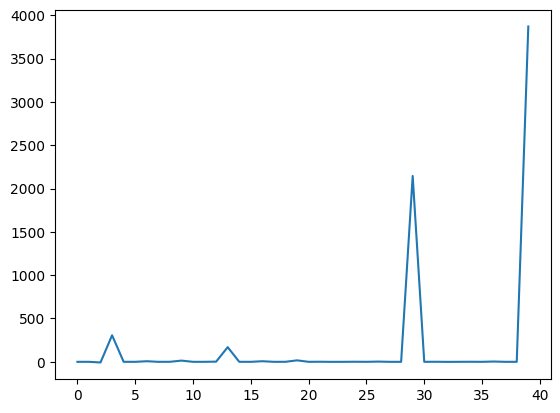

In [67]:
file_path = "../data/00/data.csv"
df = pd.read_csv(file_path)

selected_columns = ["t", "right_gaze_origin_position_in_hmd_coordinates_x", "right_gaze_origin_position_in_hmd_coordinates_y"]
df_new = df[selected_columns]

df_new = df_new.rename(columns={
    "right_gaze_origin_position_in_hmd_coordinates_x": "x",
    "right_gaze_origin_position_in_hmd_coordinates_y": "y"
})

pipeline = Pipeline(df_new['t'], df_new['x'], df_new['y'])
features = pipeline.run()
print(features)

plt.plot(features)

# Machine Learning